# Make Figures for the module demo of BRAD paper 1

In [ ]:
print('here')
import scanpy as sc
print('here')
import seaborn as sns
print('here')
import matplotlib.pyplot as plt
print('here')
import numpy as np
print('here')
import pandas as pd
print('here')

In [3]:
# Generate example single-cell data
adata = sc.datasets.pbmc3k()  # Load a small example dataset
adata.shape

(2700, 32738)

adata
adata


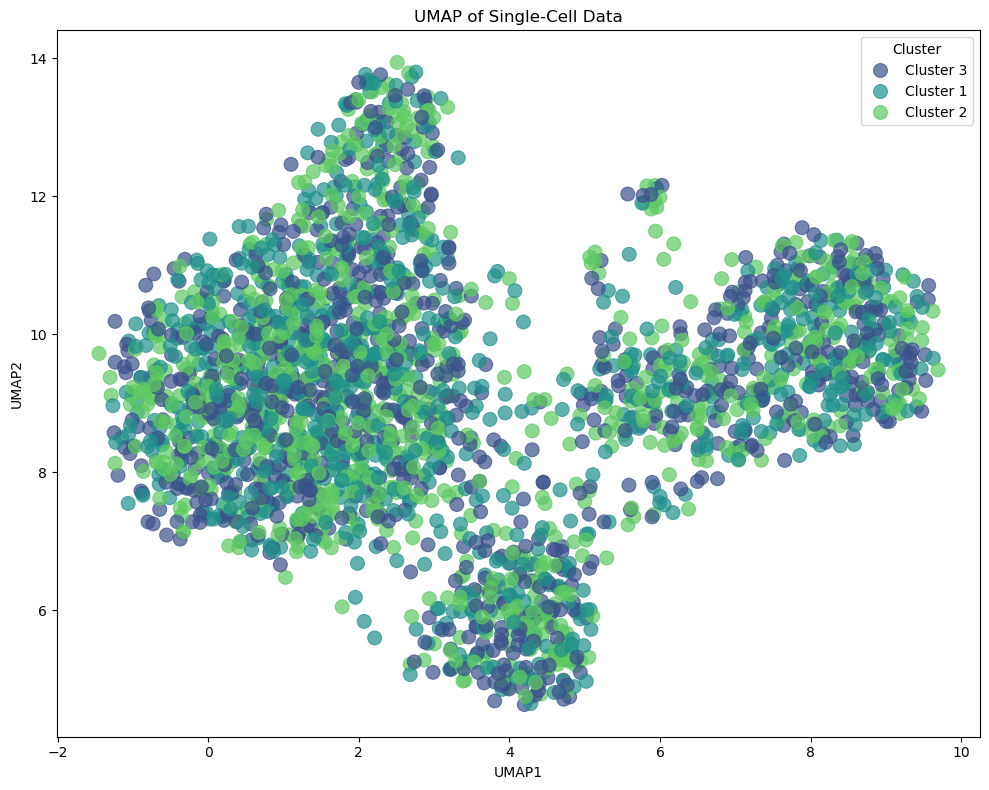

In [4]:
sc.pp.recipe_zheng17(adata)  # Preprocess the data
sc.tl.pca(adata)  # Run PCA
sc.pp.neighbors(adata)  # Compute the neighborhood graph
sc.tl.umap(adata)  # Run UMAP
print('adata')
# Extract UMAP coordinates
umap_coords = adata.obsm['X_umap']
umap_df = pd.DataFrame(umap_coords, columns=['UMAP1', 'UMAP2'])
print('adata')

# Add some example clusters
umap_df['Cluster'] = np.random.choice(['Cluster 1', 'Cluster 2', 'Cluster 3'], size=umap_df.shape[0])

In [8]:
adata.obs

,n_counts_all
index,
AAACATACAACCAC-1,2421.0
AAACATTGAGCTAC-1,4903.0
AAACATTGATCAGC-1,3149.0
AAACCGTGCTTCCG-1,2639.0
AAACCGTGTATGCG-1,981.0
...,...
TTTCGAACTCTCAT-1,3461.0
TTTCTACTGAGGCA-1,3447.0
TTTCTACTTCCTCG-1,1684.0


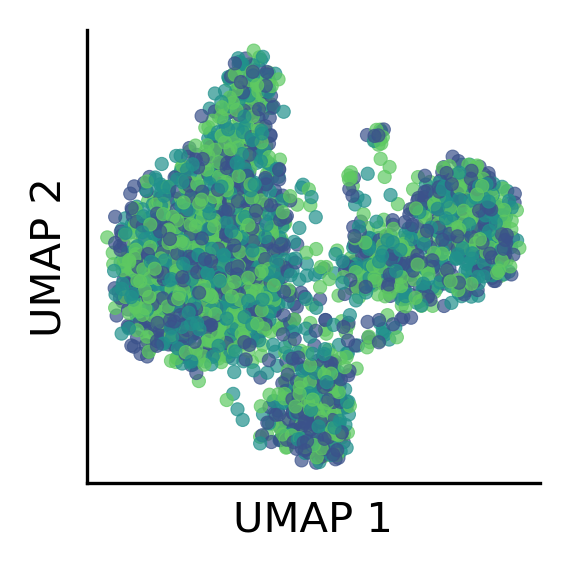

In [17]:
# Plot using seaborn
plt.figure(figsize=(2, 2), dpi=300)
sns.scatterplot(
    data=umap_df,
    x='UMAP1', y='UMAP2',
    hue='Cluster',
    palette='viridis',
    s=10,  # Size of points
    alpha=0.7,  # Transparency
    edgecolor=None
)
plt.title('')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend([],[], frameon=False)  # Turn off the legend
plt.grid(False)
sns.despine()
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()


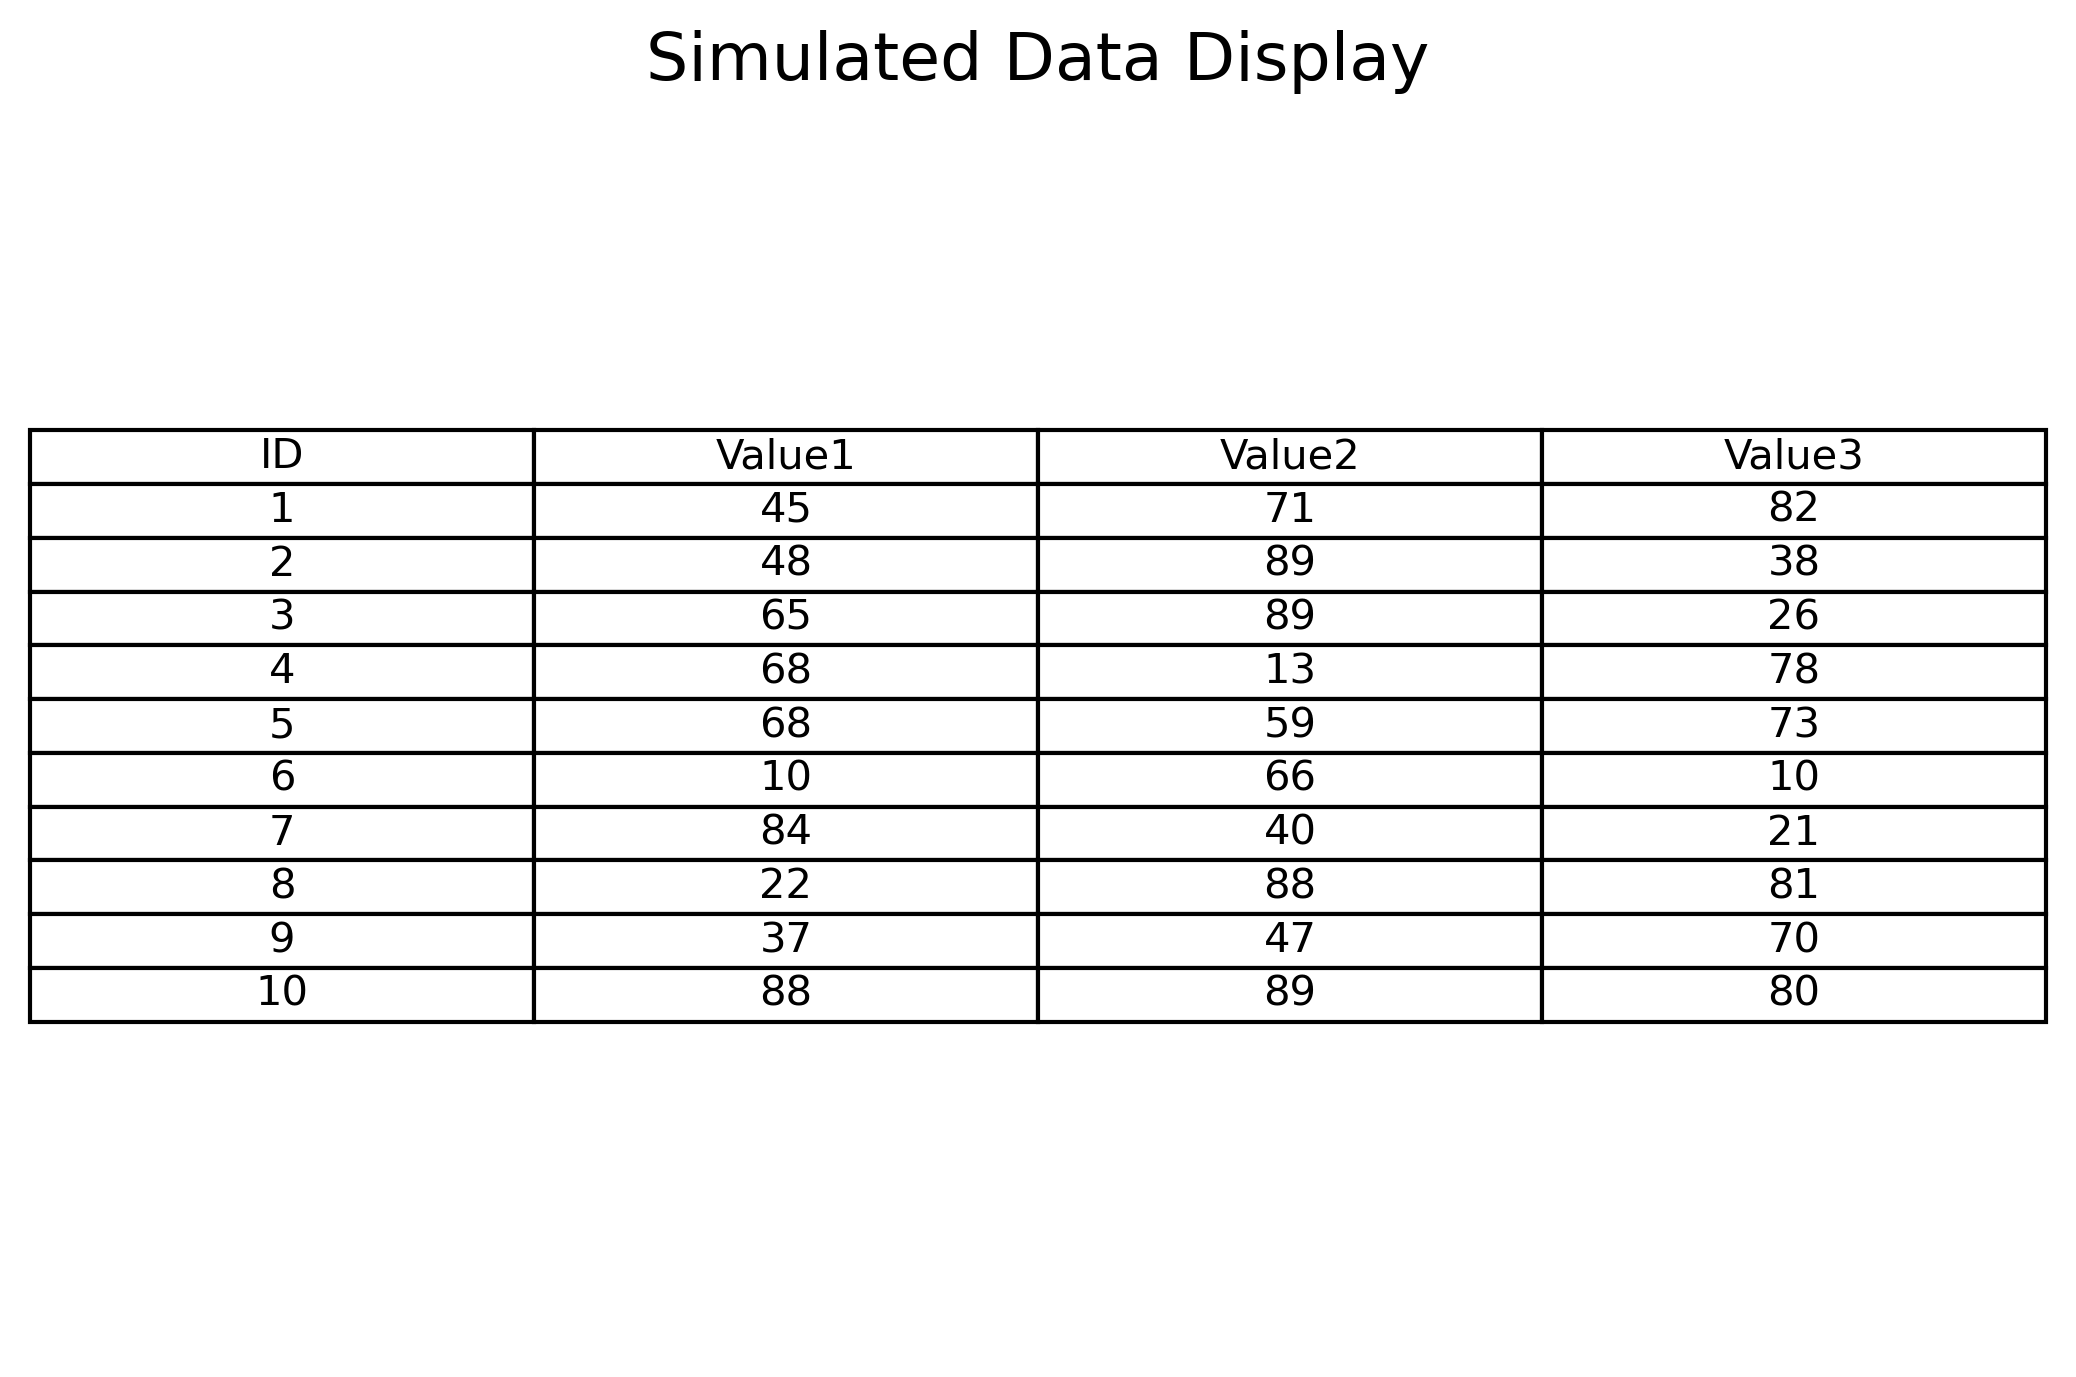

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate simulated data
np.random.seed(0)
data = {
    'ID': range(1, 11),
    'Value1': np.random.randint(1, 100, 10),
    'Value2': np.random.randint(1, 100, 10),
    'Value3': np.random.randint(1, 100, 10)
}
df = pd.DataFrame(data)

# Create a figure and a plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = plt.table(cellText=df.values,
                  colLabels=df.columns,
                  cellLoc='center',
                  loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.2, top=0.8)

# Add a title
plt.title('Simulated Data Display', fontsize=16)

# Show the plot with the table
plt.show()


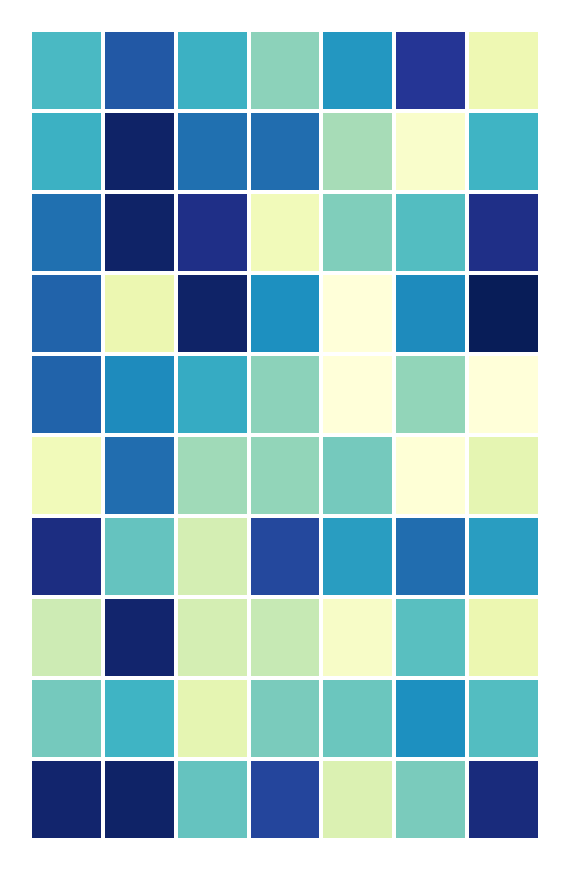

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate simulated data
np.random.seed(0)
data = {
    'ID': range(1, 11),
    'Value1': np.random.randint(1, 100, 10),
    'Value2': np.random.randint(1, 100, 10),
    'Value3': np.random.randint(1, 100, 10),
    'Value3': np.random.randint(1, 100, 10),
    'Value4': np.random.randint(1, 100, 10),
    'Value5': np.random.randint(1, 100, 10),
    'Value6': np.random.randint(1, 100, 10),
    'Value7': np.random.randint(1, 100, 10),
}
df = pd.DataFrame(data)

# Set the 'ID' column as the index
df.set_index('ID', inplace=True)

# Create the heatmap
plt.figure(figsize=(2, 3), dpi=300)
sns.heatmap(df, annot=False, cmap='YlGnBu', cbar=False, linewidths=.5, fmt="d")

# Customize the plot
plt.title('', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks([])
plt.yticks([])

# Show the plot
plt.tight_layout()
plt.show()


# Analyze RAGAs Results

Goal: Make plots and figures for the RAGAs experiment Marc worked on to put into the paper.

Auth: Joshua Pickard (jpic@umich.edu)

Date: Aug. 8, 2024

### Quick First Draft of Figures

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

filepath = '/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2'
files = [
    'llm_sol.csv', # vanilla llm no rag for simple questions
    'llm_sol_reason.csv', # vanilla llm no rag for reasoning questions,
    'llm_sol_multi.csv',
    'rage_sol.csv', # enhanced rag for simple questions
    'rage_sol_reason.csv', # enhanced rag for reasoning questions
    'rage_sol_multi.csv',
    'rag_sol.csv', # vanilla rag for simple questions
    'rag_sol_reason.csv', # vanilla rag for reasoning questions
    'rag_sol_multi.csv',
    'test_data_1.csv', # Marc says I don't need this
    'test_data_1_reason.csv', # Marc says I don't need this
]
bradType = [
    'vanilla',
    'vanilla',
    'vanilla',
    'enhanced',
    'enhanced',
    'enhanced',
    'rag',
    'rag',
    'rag',
]

dataframes = []

for filei in range(9):
    print(os.path.join(filepath, files[filei]))
    df = pd.read_csv(os.path.join(filepath, files[filei]), header=None)
    df.columns = ['question',          # text
                  'context',           # text
                  'ground truth',      # text
                  'question type',     # text
                  'source',            # text
                  'true',              # bool
                  'answer',            # text
                  'answer_relevancy',  # float
                  'faithfulness',      # float
                  'context_recall',    # float
                  'context_precision', # float
                  'answer_correctness' # float
                 ]
    df['BRAD'] = bradType[filei]
    print(f"{df.shape=}")
    dataframes.append(df)

# Concatenate all dataframes in the list into a single dataframe
df = pd.concat(dataframes, ignore_index=True)
print(f"{df.shape=}")


/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/llm_sol.csv
df.shape=(59, 13)
/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/llm_sol_reason.csv
df.shape=(55, 13)
/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/llm_sol_multi.csv
df.shape=(57, 13)
/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/rage_sol.csv
df.shape=(59, 13)
/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/rage_sol_reason.csv
df.shape=(55, 13)
/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/rage_sol_multi.csv
df.shape=(57, 13)
/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/rag_sol.csv
df.shape=(59, 13)
/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/rag_sol_reason.csv
df.shape=(55, 13)
/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/rag_sol_multi.csv
df.shape=(57, 13)
df.shape=(513, 13)


/tmp/ipykernel_1634956/2311487782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BRAD', y='answer_correctness', palette='Set2')


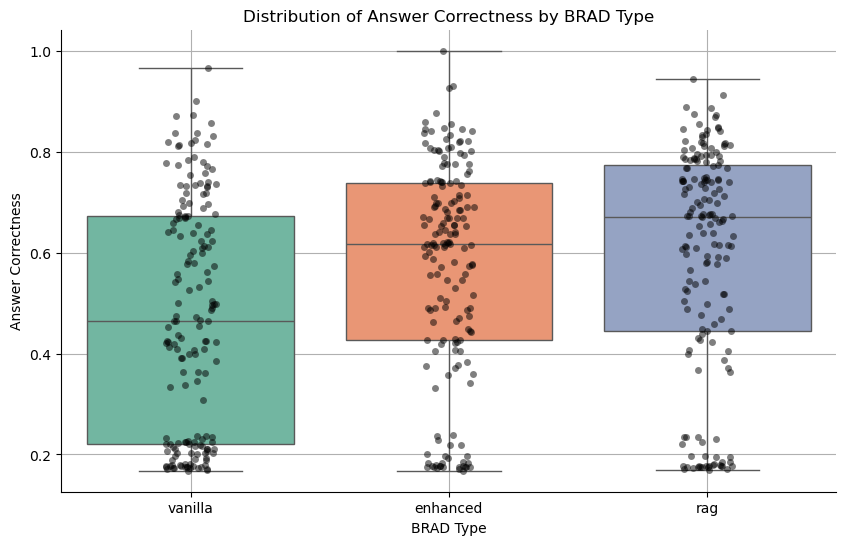

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BRAD', y='answer_correctness', palette='Set2')
sns.stripplot(data=df, x='BRAD', y='answer_correctness', color='black', alpha=0.5, jitter=True)
plt.title('Distribution of Answer Correctness by BRAD Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
# plt.savefig('answer_correctness_by_brad_type.png', dpi=300)
sns.despine()
plt.show()


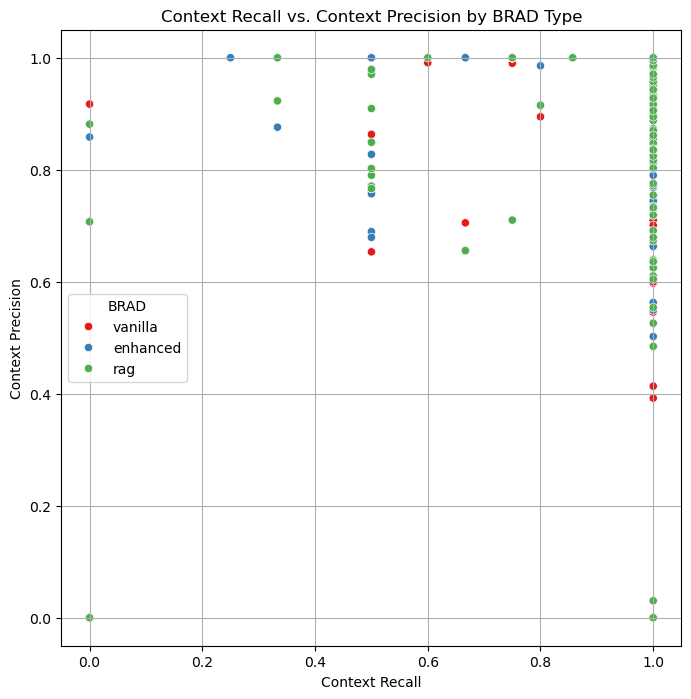

In [3]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='context_recall', y='context_precision', hue='BRAD', palette='Set1')
plt.title('Context Recall vs. Context Precision by BRAD Type')
plt.xlabel('Context Recall')
plt.ylabel('Context Precision')
plt.grid(True)
# plt.savefig('context_recall_vs_context_precision.png', dpi=300)
plt.show()


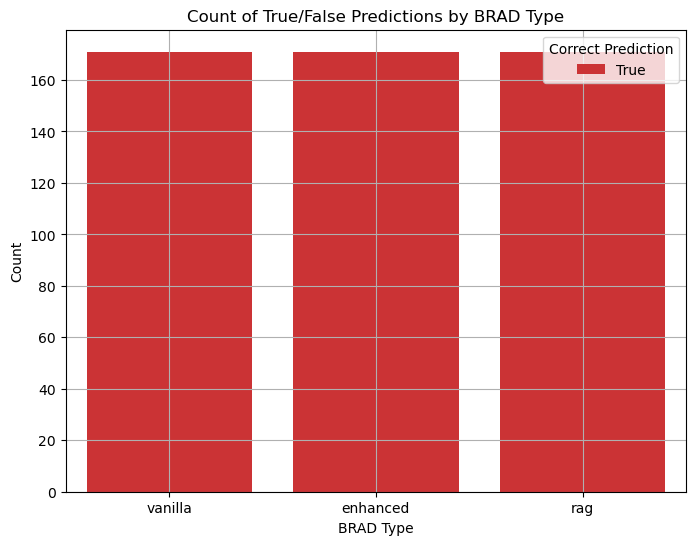

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BRAD', hue='true', palette='Set1')
plt.title('Count of True/False Predictions by BRAD Type')
plt.xlabel('BRAD Type')
plt.ylabel('Count')
plt.legend(title='Correct Prediction')
plt.grid(True)
plt.show()


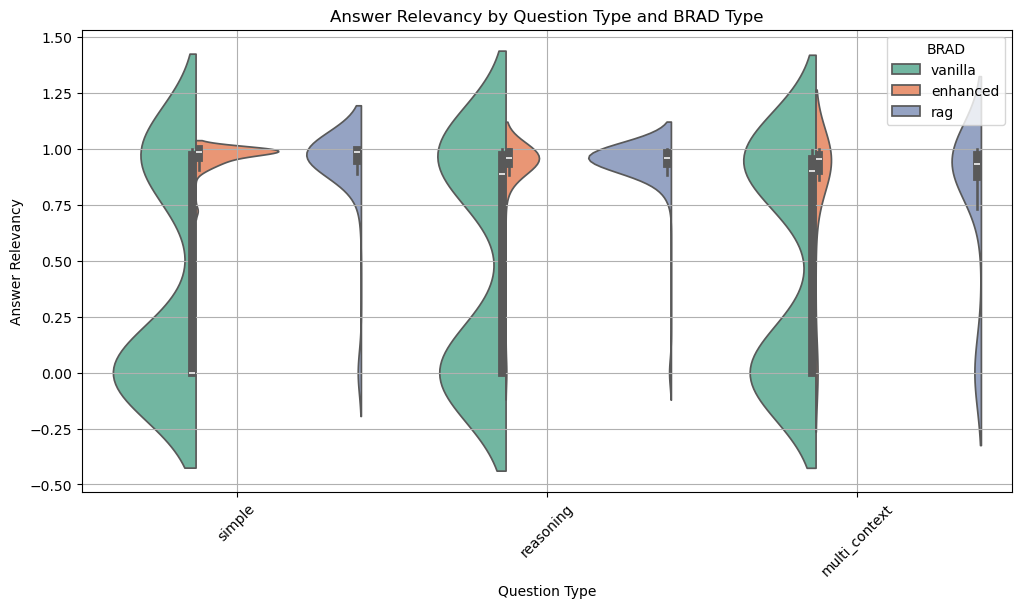

In [5]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='question type', y='answer_relevancy', hue='BRAD', split=True, palette='Set2')
plt.title('Answer Relevancy by Question Type and BRAD Type')
plt.xlabel('Question Type')
plt.ylabel('Answer Relevancy')
plt.xticks(rotation=45)
plt.grid(True)
# plt.savefig('answer_relevancy_by_question_type.png', dpi=300)
plt.show()


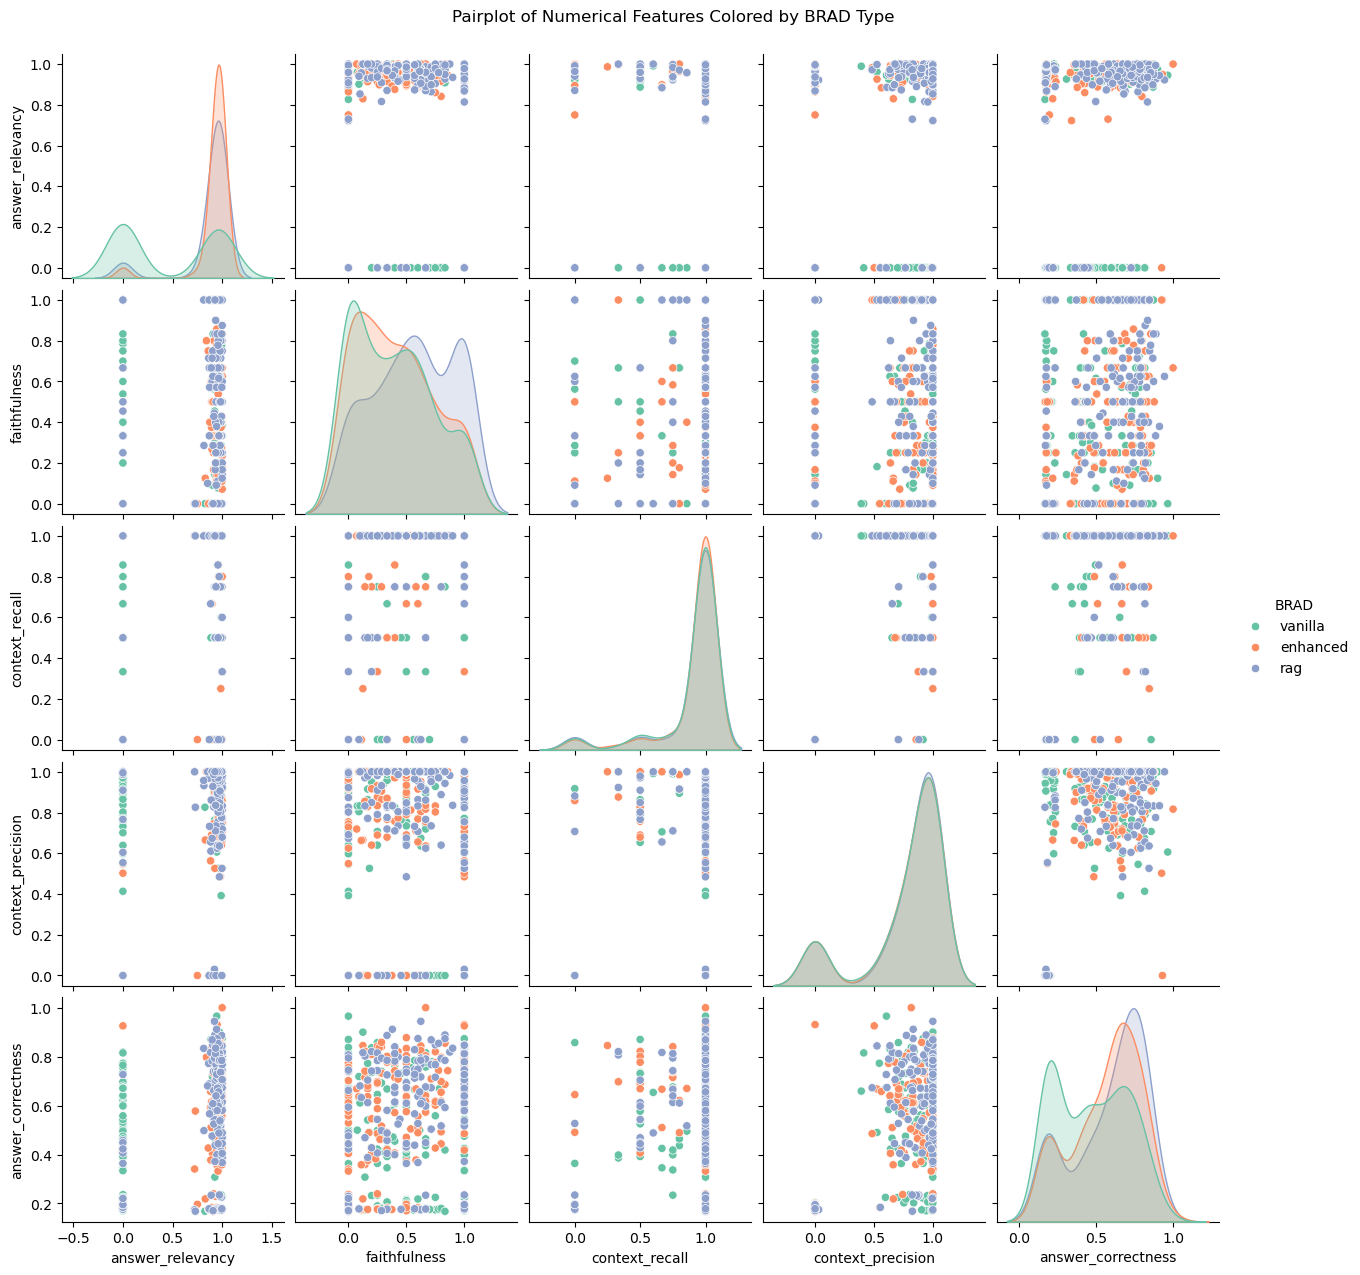

In [6]:
sns.pairplot(df, hue='BRAD', vars=['answer_relevancy', 'faithfulness', 'context_recall', 'context_precision', 'answer_correctness'], palette='Set2')
plt.suptitle('Pairplot of Numerical Features Colored by BRAD Type', y=1.02)
# plt.savefig('pairplot_numerical_features.png', dpi=300)
plt.show()


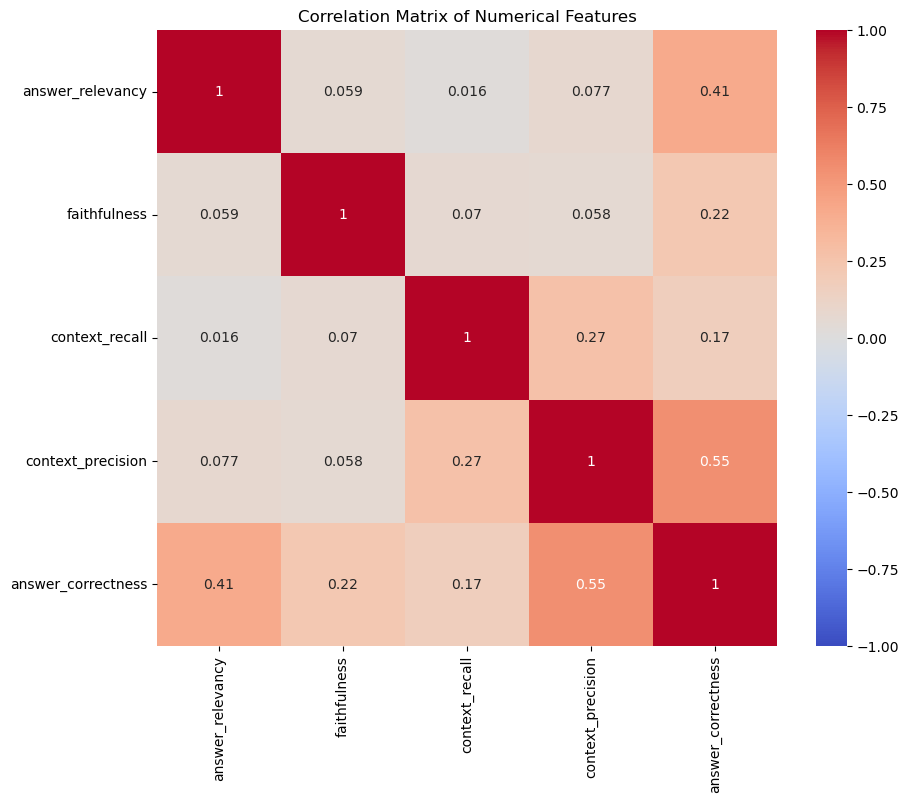

In [7]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['answer_relevancy', 'faithfulness', 'context_recall', 'context_precision', 'answer_correctness']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
# plt.savefig('correlation_matrix.png', dpi=300)
plt.show()


/tmp/ipykernel_1634956/1159079878.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='question type', y='answer_correctness', hue='BRAD', palette='Set3', ci=None)


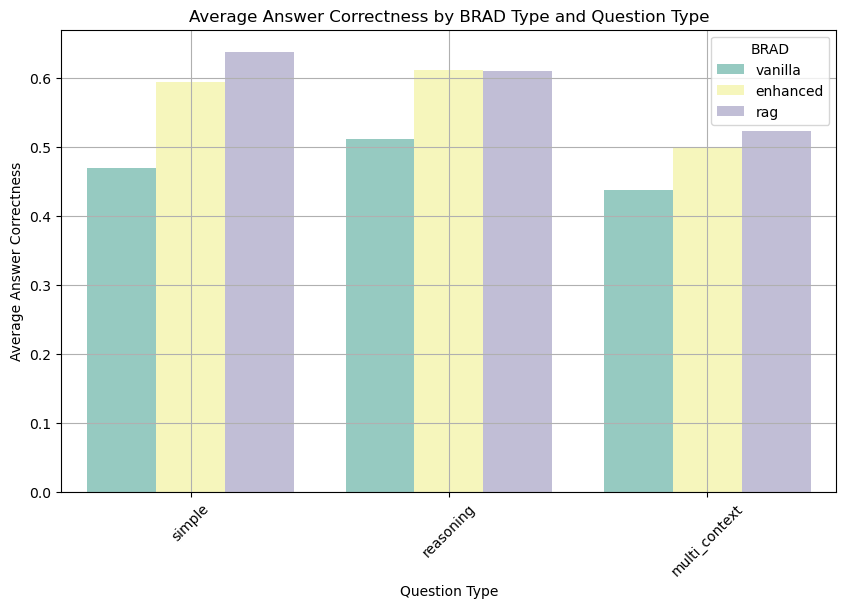

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='question type', y='answer_correctness', hue='BRAD', palette='Set3', ci=None)
plt.title('Average Answer Correctness by BRAD Type and Question Type')
plt.xlabel('Question Type')
plt.ylabel('Average Answer Correctness')
plt.xticks(rotation=45)
plt.grid(True)
# plt.savefig('avg_answer_correctness_by_question_type.png', dpi=300)
plt.show()


/tmp/ipykernel_1634956/2239000338.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


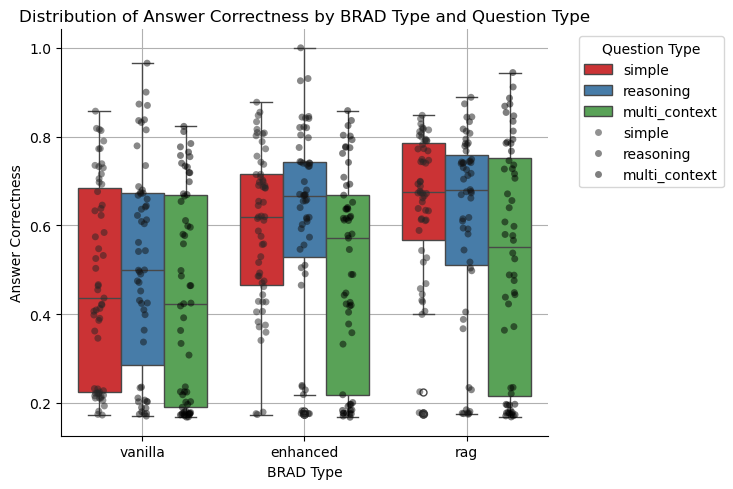

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300
# plt.savefig('answer_correctness_by_brad_type_and_question_type.png', dpi=300, figsize=(3, 5))
plt.show()


In [10]:
len(df['question'].unique())

171

In [11]:
df['question'].unique()

array(['How do B cells undergo affinity maturation during the germinal center reaction?',
       'How is the timely clearance of neutrophils critical for the resolution of inflammation?',
       'How did Levinson and Smith use the method of proving the divergence integrated along any limit cycle to establish uniqueness in their study of limit cycles?',
       'What steps were involved in the PacBio library preparation for the American Gut Project samples?',
       'How does Morse theory relate to the number of critical points in a Morse function on a manifold?',
       "How do ectopically expressed transcription factors interact with endogenous components of recipient cells' transcriptional network in induced lineage reprogramming?",
       'How are the kinetic parameters for each gene estimated using nonlinear least-squares methods in single-cell kinetics data?',
       'How has in vivo reprogramming with viral vectors been used as a strategy for regeneration of the central nervous sy

## Make Labels

This was both tedious and error prone. We need someone to double check all of the labels

In [13]:
# b=biology
# m=math
# c=computer science/data science
question_dict = {}
unique_list = df['question'].unique()
for i in range(len(unique_list)):
    print(str(i) + '/' + str(len(unique_list)))
    print(unique_list[i])
    question_dict[unique_list[i]] = input()

0/171
How do B cells undergo affinity maturation during the germinal center reaction?


 b


1/171
How is the timely clearance of neutrophils critical for the resolution of inflammation?


 b


2/171
How did Levinson and Smith use the method of proving the divergence integrated along any limit cycle to establish uniqueness in their study of limit cycles?


 m


3/171
What steps were involved in the PacBio library preparation for the American Gut Project samples?


 b


4/171
How does Morse theory relate to the number of critical points in a Morse function on a manifold?


 m


5/171
How do ectopically expressed transcription factors interact with endogenous components of recipient cells' transcriptional network in induced lineage reprogramming?


 b


6/171
How are the kinetic parameters for each gene estimated using nonlinear least-squares methods in single-cell kinetics data?


 bm


7/171
How has in vivo reprogramming with viral vectors been used as a strategy for regeneration of the central nervous system in mice?


 bc


8/171
How does Batch Normalization apply a linear transformation to the output mean in the context of OrthDNNs?


 mc


9/171
How is protein identification confirmed in the antibody characterization process?


 b


10/171
How does the concept of the unit interval relate to the Kraft inequality in coding theory?


 mc


11/171
How is the mean radius of gyration (Rg2) of chromosome 12 TADs calculated and presented in the data analysis?


 bc


12/171
How many critical points does the height function on the n-sphere have?


 m


13/171
How do B cells gain access to the GC reaction and what role does inter-clonal competition play in this process?


 b


14/171
What are some challenges in studying cell-cycle dynamics, particularly in terms of protein levels and post-translational modifications?


 bm


15/171
How do the highly non-linear dynamics of cooperative and competitive regulation of transcription factors impact the differentiation efficiency in cell reprogramming experiments?


 bmc


16/171
What is the significance of periodic network connectivity in the analysis of the discrete-time consensus algorithm?


 mc


17/171
How did the recognition of the power of computational techniques contribute to the growth of network analysis and network science?


 mc


18/171
How can physicians claim CME credits for reading content from the Journal of Investigative Dermatology?


 b


19/171
How does the inclusion of temporal information in the system impact the complexity and effectiveness of the detector-generation process in immune-inspired network IDS?


 bc


20/171
How is β-catenin involved in the promitogenic effect of TGF- β?


 b


21/171
How is IRF2 editing associated with keratinocyte differentiation and skin barrier formation?


 b


22/171
How did the use of a "physiological" buffer impact the activity of RNA polymerases in cells during the experiment?


 b


23/171
How does the spatial organization of human chromosomes change during the cell cycle?


 b


24/171
How does the substitution of serines with glutamate in cyclin B1 affect its rate of nuclear import in Xenopus oocytes?


 b


25/171
How is nuclei isolation performed for skeletal muscle tissue samples?


 b


26/171
How can Hodge Decomposition be used to identify tie strength with high accuracy?


 m


27/171
How does CTCF binding factor play a role in creating metastable states related to DNA methylation?


 b


28/171
How did Lou Pecora's research interests shift from solid-state physics to chaos theory while working at the U.S. Naval Research Laboratory in Washington?


 m


29/171
How are nucleoids released from Escherichia coli and what is their structure?


 b


30/171
How does Cyclin E control S phase progression during Drosophila embryogenesis?


 b


31/171
How does the experimental efficiency impact the quality of in silico contact maps in Hi-C, SPRITE, and GAM experiments?


 b


32/171
What are some of the mathematical problems discussed by David Hilbert in his lecture at the Second International Congress of Mathematics in 1900?


 m


33/171
How can sequence count data be used in differential expression analysis?


 bc


34/171
How were peaks called in the ChIP-seq data analysis, and what role did input controls play in this process?


 bc


35/171
How is the level of nucleosome occupancy at the TSS related to accessibility during mitosis?


 b


36/171
How can the parameters of an affine function be obtained by evaluating the function at specific vectors?


 m


37/171
How does over-fitting affect the RMS prediction error in data fitting models?


 mc


38/171
How does DEC205 targeting affect the interactions between GC BCs and TFH cells in the context of antigen presentation?


 b


39/171
How do nearby trajectories behave close to the chaotic attractor in the Lorenz system?


 m


40/171
How do deep neural networks contribute to the mapping of gene expression levels from WSIs in the study of tumor heterogeneity and survival outcomes in breast and lung cancer?


 bc


41/171
How does the spectral dimension of a simplicial complex affect the possibility of frustrated synchronization in a network?


 m


42/171
What is the significance of transforming a matrix A into real canonical form B in the context of solving differential equations?


 m


43/171
What is the significance of matrix inverses in solving linear equations and least squares problems?


 m


44/171
How does supervised learning typically approach binary classification tasks?


 c


45/171
How can data-driven algorithmic approaches help in predicting transcription factors for directed cell conversion?


 bc


46/171
Why were researchers shocked to find that the longest REM episodes occurred near the beginning of sleep, rather than near the end?


 b


47/171
What was explored in the study regarding the temporal program of gene expression in human fibroblasts in response to serum?


 b


48/171
How are homomorphism numbers calculated in the context of randomly weighted graphs?


 m


49/171
How does the CalCB method correct for known Hi-C biases and CNV in the estimation of Hi-C contact matrices?


 bc


50/171
How can weights be optimized to minimize downside risk for a given target annualized return?


 c


51/171
How can a higher-order tensor be regarded as a formal representation of a linear mapping between different spaces, such as matrix and vector spaces, based on the concept of an isomorphic link?


 m


52/171
How is haplotype imputation utilized in single-cell chromatin conformation capture?


 bc


53/171
How are vector fields defined and approximated in the context of integrability?


 m


54/171
How are local connectivity patterns represented in hypergraphs?


 m


55/171
How does Edge PageRank differentiate itself from traditional centrality measures in networks?


 m


56/171
How does T2T-CHM13 improve variant calls compared to GRCh38 in the context of the 1KGP datasets?


 bc


57/171
How has the direct conversion of various types of cells been successfully achieved and what are the potential applications of this method in medical treatment and research?


 b


58/171
How does the local track-correction module improve tracking performance in EllipTrack?


 bc


59/171
How do binary relationships affect complex topologies in network science?


 cm


60/171
What happens to most cells in Drosophila melanogaster embryos after entering G1 phase?


 b


61/171
What causes two Hopf bifurcation points to merge in degenerate cases?


 m


62/171
How does a monotone subsequence in (xn) in R imply a convergent subsequence for every bounded sequence in R?


 m


63/171
How does a spiral scaffold affect chromosome loop formation during cell division, especially in relation to inner and outer loop sizes in various models?


 c


64/171
How are eigenvalues of a square matrix affected by adding a matrix with all entries as 1?


 m


65/171
How do dominant-negative mutations contribute to genetic dominance in cancer development despite other initiation mechanisms?


 c


66/171
How do germinal centers aid immune response coordination and high-affinity antibody generation, considering TFH cell movement, GC reuse, and GC B cell clonal restriction?


 b


67/171
How do Gata4, Mef2c, and Tbx5 affect induced cardiac transcriptional reprogramming?


 b


68/171
What concept explains cascades of period doubling bifurcations in mathematical ecology models like the logistic map and Ricker model, discovered by Feigenbaum in discrete-time dynamical systems?


 m


69/171
How does a monotone subsequence in a bounded sequence in R relate to the Bolzano-Weierstrass Theorem?


 m


70/171
How do manifolds contribute to proving saddle equilibrium states in dynamical systems?


 m


71/171
What controls cell cycles in Drosophila embryogenesis, coordinating phases with growth and G1 arrest until larva hatches?


 b


72/171
What role does Myc activity play in apoptosis and oncogenic risk in Burkitt’s lymphoma?


 b


73/171
How does a magnetic field affect the supercurrent behavior observed by experimentalists studying tunneling supercurrents?


 cm


74/171
How has math influenced immunology, especially with help from physicists?


 mb


75/171
How does the requirement for adjacent edges to share two nodes in the random walk process affect its representation and Markovian nature, changing the use of traditional graph and matrix techniques for analysis?


 m


76/171
How do plasma cells differ from effector cells in humoral immunity roles, given the complex regulation mechanisms at cellular and molecular levels?


 b


77/171
How can feature mappings enhance regression models with dimension reduction and standardized features?


 c


78/171
How can protein expression in cells be controlled through growth factors availability or production in other cell types?


 b


79/171
How do post-translational modifications affect E2F1 stability and function in response to DNA damage like cisplatin?


 b


80/171
How do positive eigenvalues in a matrix connect to Sylvester's Law of Inertia and the span of eigenvectors for positive eigenvalues in the transformed matrix?


 m


81/171
How did Gemma Frisius propose longitude could be determined, as pursued by Huygens and others?


 b


82/171
How to calculate minimal state variables for a given transfer function in linear dynamical systems?


 m


83/171
How can campaign strategies be influenced by clustered voter representatives, and what is the role of k?


 c


84/171
How does finding a compatible similarity measure benefit workload and efficiency in stochastic consensus clustering?


 cm


85/171
How does the spindle assembly checkpoint help ensure correct sister-chromatid alignment during mitosis?


 b


86/171
How does V(D)J recombination impact allelic exclusion in B-cell development?


 b


87/171
How do transcription factors affect cardiac reprogramming through co-occupied binding sites and synergistic effects of Tbx5 and Gata4?


 bc


88/171
What is the initial mechanism that holds sister chromatids together by intertwining duplicated DNA molecules at adjacent replication forks?


 b


89/171
What technological innovation enabled sound and image transmission in the 20th century, leading to advancements in electronics?


 c


90/171
How does Ime2 stimulate Ndt80 in yeast for meiosis I and G1/S progression?


 b


91/171
Which locus in the (Re λ, Imλ)-plane indicates the Neimark-Sacker bifurcation with a stable closed invariant curve outside the circle?


 m


92/171
How does Mengerian property connect to hypergraphs in graph theory?


 m


93/171
How does AEP relate to entropy in information theory when dividing sequences into typical and nontypical sets based on sample entropy?


 m


94/171
What kind of trajectories in the restricted three-body problem return close to their initial state?


 m


95/171
How is Collagenase IV used in iPS cell dissociation for culture before transferring to a new dish on SNL feeder cells?


 b


96/171
How was the "global" category of smooth manifolds and maps created from the "local" category of open sets in Euclidean space and smooth maps?


 m


97/171
What makes t-SNE unique in visualizing high-dimensional data effectively?


 cb


98/171
How does Ig gene rearrangement in B-cell development relate to Ig gene allelic exclusion regulation?


 b


99/171
How is Tucker decomposition connected to higher-order PCA using factor matrices and a core tensor?


 m


100/171
How does RIG-I activation by RN7SL1 impact cGAS-STING signaling in metastatic cells?


 b


101/171
How is the preselection productive HCDR3 length distribution approximated to calculate the percentage of initial productive IgH rearrangements removed during B cell development?


 b


102/171
What stress-response system in mammalian cells prevents excessive cell proliferation by activating p53 in response to overproduction of key mitogenic signaling proteins?


 b


103/171
How does RIG-I activation by RN7SL1 impact cGAS-STING signaling in cancer cells?


 b


104/171
How does serum stimulation affect DNA replication timing and gene expression in fibroblasts?


 b


105/171
How many common neighbors do (1,1) and (2,2) have in a SRG?


 m


106/171
What was discussed by Laemmli about metaphase chromosome bands?


 b


107/171
What spatial changes occur in Hi-C maps as cells progress from prometaphase to metaphase in mitosis?


 bc


108/171
What's the condition for a map's derivative to be an immersion between smooth manifolds?


 m


109/171
What concept represents non-stationary, periodic solutions in dynamical systems and why are they significant in nonlinear dynamics?


 m


110/171
How does community modularity change with τ values in time-evolving analysis, shown by a decreasing trend from 0.70 to 0.36?


 m


111/171
How do high-order interactions affect diversity in ecological communities in simulations with different interaction strengths and species numbers?


 b


112/171
What was the AS change in FOXP1 gene at day 10 post neural induction and its impact on exon 18 inclusion in H9 hESCs?


 b


113/171
How does aligning subjective and objective probability distributions address model misspecification concerns in rational expectations models?


 m


114/171
How do miRNAs affect E2F1 protein levels in cells with 3'UTR reporter due to c-myc and E2F1, considering transcript expression in senescent populations?


 b


115/171
How do pigmented cells and chromatin affect skin patterns in zebrafish?


 b


116/171
How can vectors model cash flow movement in finance?


 m


117/171
How do p53 activators affect CDK2 activity before mitosis in relation to p21 expression?


 b


118/171
How do Fos and Jun proteins interact in wound healing, and what role do HIF factors play in the hypoxic response to tissue injury?


 b


119/171
How can genetic analysis help prioritize therapy for cancer patients without actionable oncogene mutations, considering gene signature overlap with specific cell types in different body regions?


 b


120/171
What roles do cdcgenes play in cell cycle control, especially in mitosis entry and S phase replication origin activation?


 b


121/171
What role do homoclinic orbits play in bifurcation diagrams in curve dynamics with limit cycles and saddle points?


 m


122/171
What components form the inner kinetochore in higher eukaryotic cells and how do they aid in chromosome attachment and tension during cell division?


 b


123/171
What are the implications of recent research on converting glial cells, like astrocytes, into neurons for brain repair therapies?


 b


124/171
What's the BSC capacity with crossover probability for a coding scheme with two 3-length codewords and an average error probability of 0.285?


 bc


125/171
How does Morse theorem affect density of Morse functions in space of smooth functions on a manifold?


 m


126/171
What defines a true somatic stem cell in terms of self-renewal and progeny generation, considering differentiation and lineage commitment in Waddington's model?


 b


127/171
How does the cell cycle affect epigenetic marks for memory, considering mitosis and S-phase impact on gene expression and chromatin?


 b


128/171
How do Wnts affect somite patterning in myogenesis?


 b


129/171
How do Wnt proteins affect somite cell commitment?


 b


130/171
How do cells in an epithelium maintain adhesive contacts with neighbors during division, and how does this relate to junction formation and cell cleavage in cytokinesis?


 b


131/171
How is transversality defined in dynamical systems with periodic orbits and hypersurfaces?


 m


132/171
How do basic fibroblast growth factor-impregnated gelatin microspheres affect fibroblast migration in 3D wound healing?


 b


133/171
How is the adjacency matrix used in link prediction algorithms in different fields?


 mc


134/171
How do Gata4, Mef2c, and Tbx5 affect induced cardiac myocyte reprogramming and heart repair?


 bc


135/171
Which company provided the artificial dura for the primate BMI task?


 b


136/171
How to simplify integro-differential equations using real canonical form for an n x n matrix?


 m


137/171
Can you provide examples of research studies on dynamical processes in complex networks beyond pairwise interactions?


 mc


138/171
What is Herman's theorem's role in analyzing Morse-Smale vector fields with the Poincare-Bendixson theorem?


 m


139/171
How do algorithms for integer multiplication use polynomial rings and tensors?


 mc


140/171
How does LZ algorithm efficiency impact file compression in terms of bits for pointers and match lengths in LZ77?


 c


141/171
How do tangent vectors and constants characterize an expanding map on a compact Riemannian manifold, and how does this relate to stability in topological spaces?


 m


142/171
How are external circuit parameters chosen to place complex-conjugate poles slightly right of jω-axis in a multiterminal device circuit?


 mc


143/171
How do V, D, and J segment rearrangements impact antibody and T cell receptor encoding in the immune system?


 b


144/171
How can a cell create lasting memory of a response using transcription and DNA replication?


 b


145/171
How does TF over-expression affect network dominance in the omnigenic model, considering simplified regulatory networks and TFs' role in cellular reprogramming?


 bc


146/171
How does a graphon relate to the node set [0,1] in terms of structure and connectivity?


 mc


147/171
What is the role of the Nbs1 subunit in activating ATM through the MRN complex in response to double-strand breaks?


 b


148/171
What are the key features and practical uses of the Watts model in social contagions on networks, considering its relationship with Granovetter's threshold models and the incorporation of simplicial complexes in modeling transmission dynamics?


 c


149/171
What happens to the fixed points of period-seven cycles as r changes in one or two-parameter bifurcations?


 m


150/171
How does vertex-transitivity demonstrate the relationship between a graph's structure and its automorphisms, especially in Cayley graphs and the lexicographic product?


 m


151/171
How does Cyclin B1-Cdk1 complexes affect CDK2 activity post-mitosis in proliferating cells?


 b


152/171
How is the two-parameter bifurcation diagram constructed for a system with codim 1 and codim 2 bifurcations of equilibria, limit cycles, and homoclinic orbits?


 m


153/171
How to reconstitute functional modules in vitro using gene expression and morphology from various cell types?


 b


154/171
How do centrosomes help with sister chromatid bi-orientation during spindle assembly?


 b


155/171
How does scRNA-seq compare to snRNA-seq in studying transcriptional reprogramming and chromatin interactions?


 b


156/171
How does removing ECB sequences affect Start synchronization in yeast cells, considering growth rate differences?


 b


157/171
Which fellowship organization supported the research at the Yale Stem Cell Center Genomics Core Facility?


 b


158/171
How do factors contribute to hiHeps induction for drug metabolism?


 b


159/171
How do aged HSCs compare to younger HSCs in terms of regenerative potential, proliferation, and lineage tracing data?


 b


160/171
How is the Edge PageRank equilibrium point represented in a dynamical system, considering node centrality and random walks?


 mc


161/171
How can Sis interference in Vj-Jj interval prevent secondary recombination events on the same Ig allele?


 b


162/171
How can periodic solutions be shown under Hopf conditions with Lyapunov-Schmidt reduction and Poincaré normalization?


 m


163/171
How does lateral inhibition affect feather primordia spacing in chicks, considering growth and regeneration in pattern formation?


 b


164/171
How does the lasso penalty promote sparsity in regression for neuroimaging data?


 bc


165/171
How is the Laplace operator shown in TT-format for tensors in linear operators and elliptic PDE solutions?


 m


166/171
What advantage does CD9 offer in isolating murine hematopoietic stem cells?


 b


167/171
How is a rewriting event in GNA models defined in relation to node mapping and Kronecker matrix sampling?


 m


168/171
How is fresh frozen tissue fixed with Formaldehyde for immunoﬂuorescence staining in mouse embryo tissue?


 b


169/171
What causes unexplained stock market fluctuations attributed to decentralized networks and herd behavior?


 c


170/171
What causes motor neuron degeneration in ALS and how do interactions with glia contribute?


 b


In [18]:
df['machoi-labels'] = df['question'].map(question_dict)
df

,question,context,ground truth,question type,source,true,answer,answer_relevancy,faithfulness,context_recall,context_precision,answer_correctness,BRAD,machoi-labels
0,How do B cells undergo affinity maturation dur...,"[""'Affinity maturation\\nThe somatic mutation ...",B cells undergo affinity maturation during the...,simple,[{'source': 'dynamics of b cells in germinal c...,True,"During the germinal center reaction, B cells u...",1.000000,0.142857,1.0,1.000000,0.715587,vanilla,b
1,How is the timely clearance of neutrophils cri...,"[""'and forma phagocytic cup that engulfs antig...",Timely clearance of neutrophils is critical fo...,simple,[{'source': 'wound healing a cellular perspect...,True,BRAD: The timely clearance of neutrophils is c...,0.993118,0.500000,0.5,0.653362,0.466499,vanilla,b
2,How did Levinson and Smith use the method of p...,"[""'VI"" 'Th e metho d of Levinso n and Smith'\n...",Levinson and Smith used the method of proving ...,simple,[{'source': 'theory of limit cycles'}],True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.500000,1.0,1.000000,0.215930,vanilla,m
3,What steps were involved in the PacBio library...,"[""'of PacBio UMI sequencing of rRNA operons of...",PacBio library preparation for the American Gu...,simple,[{'source': 'high-accuracy long-read amplicon ...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.0,1.000000,0.210913,vanilla,b
4,How does Morse theory relate to the number of ...,"[""'270 An Overview of Floer Homology Theories ...",Morse theory relates to the number of critical...,simple,[{'source': 'banyaga-hurtubise2004_book_lectur...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.0,0.968254,0.463782,vanilla,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,What advantage does CD9 offer in isolating mur...,"[""'A"" ', Underhill, T' 'M' ', and Bhatia, M' '...",The advantage of CD9 in isolating murine hemat...,multi_context,[{'source': 'cooperative transcription factor ...,True,I don't have the specific information regardin...,0.000000,1.000000,1.0,0.604473,0.726860,rag,b
509,How is a rewriting event in GNA models defined...,"[""'Eandalsospecifiesthe\\ncorrespondenceofnode...",The rewriting event in GNA models is defined a...,multi_context,[{'source': 'modeling complex systems with ada...,True,I don't have enough information to provide a s...,0.000000,0.000000,1.0,0.994786,0.220796,rag,m
510,How is fresh frozen tissue fixed with Formalde...,"[""'Immunoﬂuorescence staining\\nImmunoﬂuoresce...",The fresh frozen tissue sections are fixed wit...,multi_context,[{'source': 'high-spatial-resolution multi-omi...,True,To fix fresh frozen tissue with Formaldehyde f...,0.978048,1.000000,1.0,0.905556,0.537682,rag,b
511,What causes unexplained stock market fluctuati...,"[""'decentralized networks, spontaneous\\noutbr...",The answer to given question is not present in...,multi_context,"[{'source': 'strogatzsync'}, {'source': 'strog...",True,The unexplained stock market fluctuations attr...,0.996494,0.571429,1.0,0.000000,0.178494,rag,c


In [19]:
df['Computer Science'] = df['machoi-labels'].str.contains('c', na=False)
df['Mathematics'] = df['machoi-labels'].str.contains('m', na=False)
df['Biology'] = df['machoi-labels'].str.contains('b', na=False)
df

,question,context,ground truth,question type,source,true,answer,answer_relevancy,faithfulness,context_recall,context_precision,answer_correctness,BRAD,machoi-labels,Computer Science,Mathematics,Biology
0,How do B cells undergo affinity maturation dur...,"[""'Affinity maturation\\nThe somatic mutation ...",B cells undergo affinity maturation during the...,simple,[{'source': 'dynamics of b cells in germinal c...,True,"During the germinal center reaction, B cells u...",1.000000,0.142857,1.0,1.000000,0.715587,vanilla,b,False,False,True
1,How is the timely clearance of neutrophils cri...,"[""'and forma phagocytic cup that engulfs antig...",Timely clearance of neutrophils is critical fo...,simple,[{'source': 'wound healing a cellular perspect...,True,BRAD: The timely clearance of neutrophils is c...,0.993118,0.500000,0.5,0.653362,0.466499,vanilla,b,False,False,True
2,How did Levinson and Smith use the method of p...,"[""'VI"" 'Th e metho d of Levinso n and Smith'\n...",Levinson and Smith used the method of proving ...,simple,[{'source': 'theory of limit cycles'}],True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.500000,1.0,1.000000,0.215930,vanilla,m,False,True,False
3,What steps were involved in the PacBio library...,"[""'of PacBio UMI sequencing of rRNA operons of...",PacBio library preparation for the American Gu...,simple,[{'source': 'high-accuracy long-read amplicon ...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.0,1.000000,0.210913,vanilla,b,False,False,True
4,How does Morse theory relate to the number of ...,"[""'270 An Overview of Floer Homology Theories ...",Morse theory relates to the number of critical...,simple,[{'source': 'banyaga-hurtubise2004_book_lectur...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.0,0.968254,0.463782,vanilla,m,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,What advantage does CD9 offer in isolating mur...,"[""'A"" ', Underhill, T' 'M' ', and Bhatia, M' '...",The advantage of CD9 in isolating murine hemat...,multi_context,[{'source': 'cooperative transcription factor ...,True,I don't have the specific information regardin...,0.000000,1.000000,1.0,0.604473,0.726860,rag,b,False,False,True
509,How is a rewriting event in GNA models defined...,"[""'Eandalsospecifiesthe\\ncorrespondenceofnode...",The rewriting event in GNA models is defined a...,multi_context,[{'source': 'modeling complex systems with ada...,True,I don't have enough information to provide a s...,0.000000,0.000000,1.0,0.994786,0.220796,rag,m,False,True,False
510,How is fresh frozen tissue fixed with Formalde...,"[""'Immunoﬂuorescence staining\\nImmunoﬂuoresce...",The fresh frozen tissue sections are fixed wit...,multi_context,[{'source': 'high-spatial-resolution multi-omi...,True,To fix fresh frozen tissue with Formaldehyde f...,0.978048,1.000000,1.0,0.905556,0.537682,rag,b,False,False,True
511,What causes unexplained stock market fluctuati...,"[""'decentralized networks, spontaneous\\noutbr...",The answer to given question is not present in...,multi_context,"[{'source': 'strogatzsync'}, {'source': 'strog...",True,The unexplained stock market fluctuations attr...,0.996494,0.571429,1.0,0.000000,0.178494,rag,c,True,False,False


In [48]:
QtoLabels = {}
for i, question in enumerate(df['question']):
    if i == len(inputs):
        break
    QtoLabels[question] = inputs[i]

In [56]:
allInputs = []
for i, question in enumerate(df['question']):
    allInputs.append(QtoLabels[question].lower())
print(f"{len(allInputs)=}")
df['jpic-labels'] = allInputs
# Create new columns based on the presence of 'c', 'm', 'b' in the 'jpic-labels' column
df['Computer Science'] = df['jpic-labels'].str.contains('c', na=False)
df['Mathematics'] = df['jpic-labels'].str.contains('m', na=False)
df['Biology'] = df['jpic-labels'].str.contains('b', na=False)
df

len(allInputs)=342


,question,context,ground truth,question type,source,true,answer,answer_relevancy,faithfulness,context_recall,context_precision,answer_correctness,BRAD,jpic-labels,Computer Science,Mathematics,Biology
0,How do B cells undergo affinity maturation dur...,"[""'Affinity maturation\\nThe somatic mutation ...",B cells undergo affinity maturation during the...,simple,[{'source': 'dynamics of b cells in germinal c...,True,"During the germinal center reaction, B cells u...",1.000000,0.142857,1.00,1.000000,0.715587,vanilla,b,False,False,True
1,How is the timely clearance of neutrophils cri...,"[""'and forma phagocytic cup that engulfs antig...",Timely clearance of neutrophils is critical fo...,simple,[{'source': 'wound healing a cellular perspect...,True,BRAD: The timely clearance of neutrophils is c...,0.993118,0.500000,0.50,0.653362,0.466499,vanilla,b,False,False,True
2,How did Levinson and Smith use the method of p...,"[""'VI"" 'Th e metho d of Levinso n and Smith'\n...",Levinson and Smith used the method of proving ...,simple,[{'source': 'theory of limit cycles'}],True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.500000,1.00,1.000000,0.215930,vanilla,m,False,True,False
3,What steps were involved in the PacBio library...,"[""'of PacBio UMI sequencing of rRNA operons of...",PacBio library preparation for the American Gu...,simple,[{'source': 'high-accuracy long-read amplicon ...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.00,1.000000,0.210913,vanilla,b,False,False,True
4,How does Morse theory relate to the number of ...,"[""'270 An Overview of Floer Homology Theories ...",Morse theory relates to the number of critical...,simple,[{'source': 'banyaga-hurtubise2004_book_lectur...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.00,0.968254,0.463782,vanilla,m,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,"What concept represents non-stationary, period...","['""Chapter 3\\nSTRUCTURALLY STABLE\\nPERIODIC ...","Non-stationary, periodic solutions in dynamica...",reasoning,[{'source': 'bifurcation theory'}],True,"The concept that represents non-stationary, pe...",0.972551,1.000000,1.00,0.635814,0.844361,rag,m,False,True,False
338,How does community modularity change with τ va...,"[""'a time evolvingcommunity""\n '\\nTo further ...",The modularity of the detected community struc...,reasoning,[{'source': 'faccin - 2022 - measuring dynamic...,True,The community modularity decreases with τ valu...,0.953794,1.000000,1.00,0.870127,0.741306,rag,mc,True,True,False
339,How do high-order interactions affect diversit...,"[""'High-order interactions set a lower bound o...",High-order interactions set a lower bound on d...,reasoning,[{'source': 'high-order species interactions s...,True,High-order interactions in ecological communit...,0.960201,0.250000,1.00,1.000000,0.784146,rag,mbc,True,True,True
340,What was the AS change in FOXP1 gene at day 10...,"[""'Procedures and Figure S1 available online)""...",The AS change in the FOXP1 gene at day 10 post...,reasoning,[{'source': 'piis0092867411009494'}],True,"At day 10 post neural induction, the AS change...",0.922762,0.000000,0.75,1.000000,0.794407,rag,b,False,False,True


In [20]:
df.to_csv('/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/machoi_labeled_ds.csv')

## Labels Venn Diagram

Show distribution of question labels

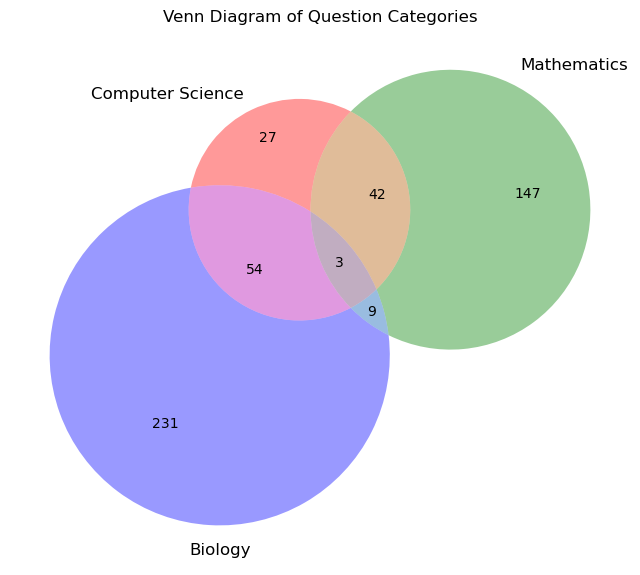

In [21]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Count the sets: CS, Math, Bio
cs = df['Computer Science']
math = df['Mathematics']
bio = df['Biology']

# Calculate the sizes for the Venn diagram
subset_sizes = {
    '100': sum(cs & ~math & ~bio),  # Only Computer Science
    '010': sum(~cs & math & ~bio),  # Only Mathematics
    '001': sum(~cs & ~math & bio),  # Only Biology
    '110': sum(cs & math & ~bio),   # Computer Science and Mathematics
    '101': sum(cs & ~math & bio),   # Computer Science and Biology
    '011': sum(~cs & math & bio),   # Mathematics and Biology
    '111': sum(cs & math & bio)     # All three
}

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3(subsets=subset_sizes, set_labels=('Computer Science', 'Mathematics', 'Biology'))

# Add a title
plt.title("Venn Diagram of Question Categories")
plt.show()


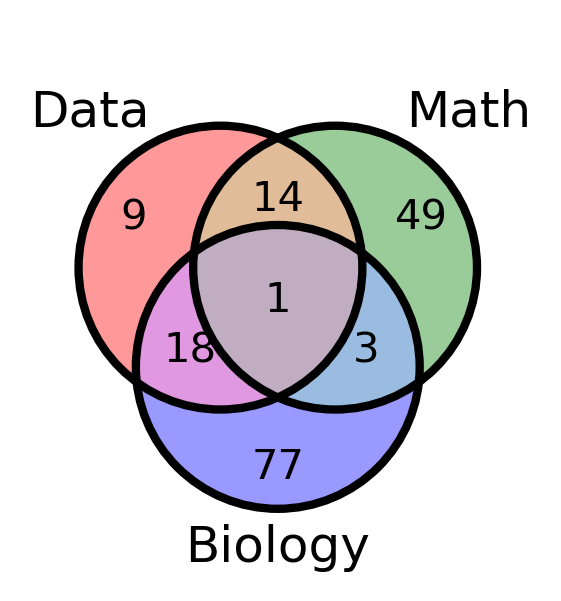

In [29]:
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt

# Count the sets: CS, Math, Bio
cs = df['Computer Science']
math = df['Mathematics']
bio = df['Biology']

# Calculate the sizes for the Venn diagram
subset_sizes = {
    '100': int(sum(cs & ~math & ~bio)/3),  # Only Computer Science
    '010': int(sum(~cs & math & ~bio)/3),  # Only Mathematics
    '001': int(sum(~cs & ~math & bio)/3),  # Only Biology
    '110': int(sum(cs & math & ~bio)/3),   # Computer Science and Mathematics
    '101': int(sum(cs & ~math & bio)/3),   # Computer Science and Biology
    '011': int(sum(~cs & math & bio)/3),   # Mathematics and Biology
    '111': int(sum(cs & math & bio)/3)     # All three
}

# Create the Venn diagram with equal-sized circles
plt.figure(figsize=(2,2), dpi=300)
venn = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels=('Data', 'Math', 'Biology'))
venn_circles = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1))

# Update the labels with the actual subset sizes
for idx, label in enumerate(['100', '010', '001', '110', '101', '011', '111']):
    venn.get_label_by_id(label).set_text(subset_sizes[label])

# Add a title
plt.title(" ")
plt.show()


## Make plots for figure

/tmp/ipykernel_1634956/2239000338.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


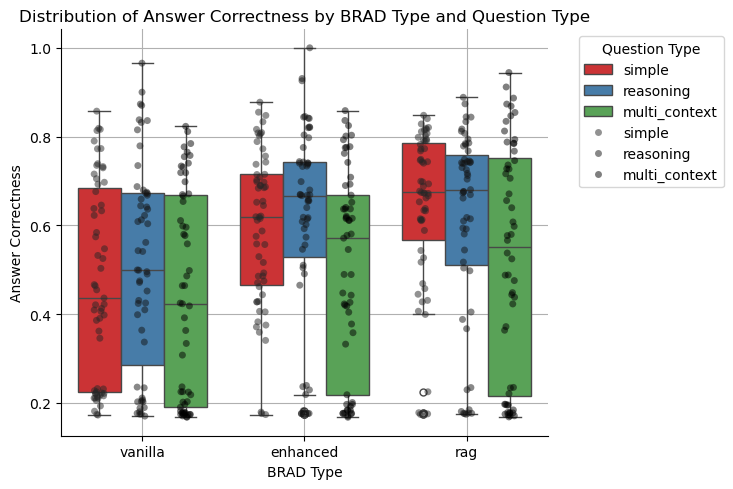

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300
# plt.savefig('answer_correctness_by_brad_type_and_question_type.png', dpi=300, figsize=(3, 5))
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300
# plt.savefig('answer_correctness_by_brad_type_and_question_type.png', dpi=300, figsize=(3, 5))
plt.show()


In [102]:
row

question              How does aligning subjective and objective pro...
context               ['"isasmuchofa\\nproblem ineconomics asitisinp...
ground truth          Aligning subjective and objective probability ...
question type                                                 reasoning
source                                       [{'source': 'robustness'}]
true                                                               True
answer                Aligning subjective and objective probability ...
answer_relevancy                                               0.989458
faithfulness                                                        0.0
context_recall                                                      1.0
context_precision                                               0.69127
answer_correctness                                             0.745042
BRAD                                                                rag
jpic-labels                                                     

In [24]:
import pandas as pd

# Initialize list to collect rows
rows = []

# Iterate over each row in the original dataframe
for _, row in df.iterrows():
    if row['Computer Science']:
        rows.append({
            'BRAD': row['BRAD'],
            'topic': 'Computer Science',
            'type': row['question type'],
            'correctness': row['answer_correctness'],
            'question': row['question'],
            'context': row['context'],
            'ground truth': row['ground truth'],
            'source': row['source'],
            'true': row['true'],
            'answer': row['answer'],
            'answer_relevancy': row['answer_relevancy'],
            'faithfulness': row['faithfulness'],
            'context_recall': row['context_recall'],
            'context_precision': row['context_precision'],
            'answer_correctness': row['answer_correctness'],
            'Biology': row['Biology'],
            'Mathematics': row['Mathematics'],
            'Computer Science': row['Computer Science']
        })
    if row['Mathematics']:
        rows.append({
            'BRAD': row['BRAD'],
            'topic': 'Mathematics',
            'type': row['question type'],
            'correctness': row['answer_correctness'],
            'question': row['question'],
            'context': row['context'],
            'ground truth': row['ground truth'],
            'source': row['source'],
            'true': row['true'],
            'answer': row['answer'],
            'answer_relevancy': row['answer_relevancy'],
            'faithfulness': row['faithfulness'],
            'context_recall': row['context_recall'],
            'context_precision': row['context_precision'],
            'answer_correctness': row['answer_correctness'],
            'Biology': row['Biology'],
            'Mathematics': row['Mathematics'],
            'Computer Science': row['Computer Science']
        })
    if row['Biology']:
        rows.append({
            'BRAD': row['BRAD'],
            'topic': 'Biology',
            'type': row['question type'],
            'correctness': row['answer_correctness'],
            'question': row['question'],
            'context': row['context'],
            'ground truth': row['ground truth'],
            'source': row['source'],
            'true': row['true'],
            'answer': row['answer'],
            'answer_relevancy': row['answer_relevancy'],
            'faithfulness': row['faithfulness'],
            'context_recall': row['context_recall'],
            'context_precision': row['context_precision'],
            'answer_correctness': row['answer_correctness'],
            'Biology': row['Biology'],
            'Mathematics': row['Mathematics'],
            'Computer Science': row['Computer Science']
        })

# Convert list of dictionaries to DataFrame
pdf = pd.DataFrame(rows)

# Display the resulting DataFrame
print(pdf.head())


      BRAD        topic    type  correctness  \
0  vanilla      Biology  simple     0.715587   
1  vanilla      Biology  simple     0.466499   
2  vanilla  Mathematics  simple     0.215930   
3  vanilla      Biology  simple     0.210913   
4  vanilla  Mathematics  simple     0.463782   

                                            question  \
0  How do B cells undergo affinity maturation dur...   
1  How is the timely clearance of neutrophils cri...   
2  How did Levinson and Smith use the method of p...   
3  What steps were involved in the PacBio library...   
4  How does Morse theory relate to the number of ...   

                                             context  \
0  ["'Affinity maturation\\nThe somatic mutation ...   
1  ["'and forma phagocytic cup that engulfs antig...   
2  ["'VI" 'Th e metho d of Levinso n and Smith'\n...   
3  ["'of PacBio UMI sequencing of rRNA operons of...   
4  ["'270 An Overview of Floer Homology Theories ...   

                                     

/tmp/ipykernel_1634956/2883069458.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


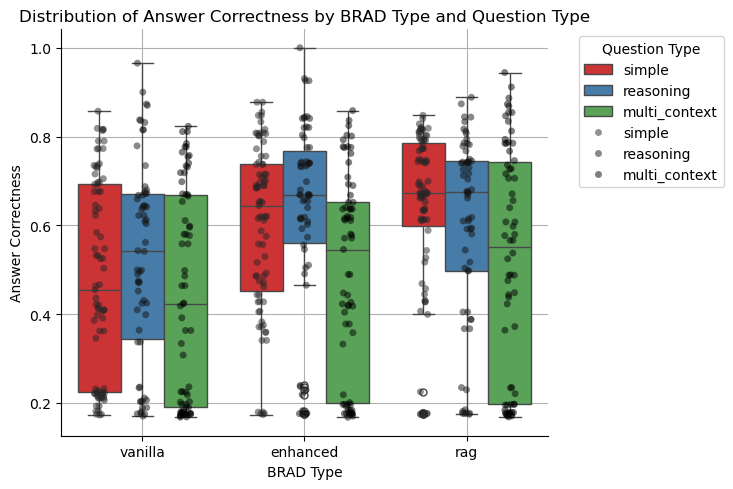

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=pdf, 
    x='BRAD', 
    y='correctness', 
    hue='type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=pdf, 
    x='BRAD', 
    y='correctness', 
    hue='type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300
# plt.savefig('answer_correctness_by_brad_type_and_question_type.png', dpi=300, figsize=(3, 5))
plt.show()


/tmp/ipykernel_1299669/2408569866.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


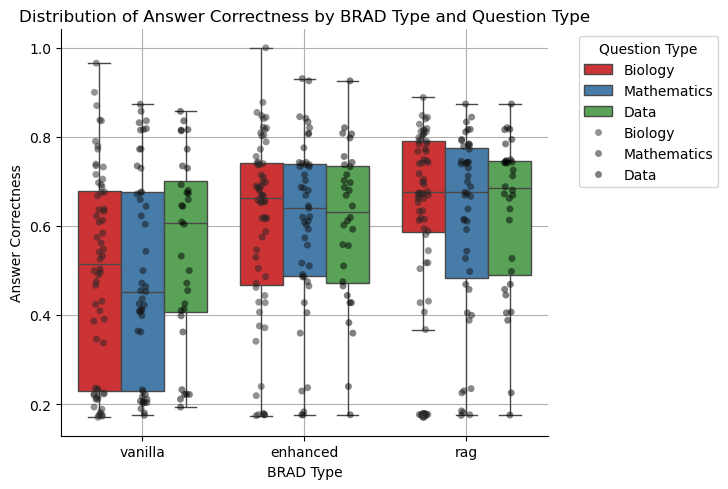

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=pdf, 
    x='BRAD', 
    y='correctness', 
    hue='topic', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=pdf, 
    x='BRAD', 
    y='correctness', 
    hue='topic', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300
# plt.savefig('answer_correctness_by_brad_type_and_question_type.png', dpi=300, figsize=(3, 5))
plt.show()


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   question            342 non-null    object 
 1   context             342 non-null    object 
 2   ground truth        342 non-null    object 
 3   question type       342 non-null    object 
 4   source              342 non-null    object 
 5   true                342 non-null    bool   
 6   answer              342 non-null    object 
 7   answer_relevancy    342 non-null    float64
 8   faithfulness        341 non-null    float64
 9   context_recall      342 non-null    float64
 10  context_precision   342 non-null    float64
 11  answer_correctness  342 non-null    float64
 12  BRAD                342 non-null    object 
 13  jpic-labels         342 non-null    object 
 14  Computer Science    342 non-null    bool   
 15  Mathematics         342 non-null    bool   
 16  Biology 

In [108]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BRAD               429 non-null    object 
 1   topic              429 non-null    object 
 2   type               429 non-null    object 
 3   correctness        429 non-null    float64
 4   question           429 non-null    object 
 5   context            429 non-null    object 
 6   ground truth       429 non-null    object 
 7   source             429 non-null    object 
 8   true               429 non-null    bool   
 9   answer             429 non-null    object 
 10  answer_relevancy   429 non-null    float64
 11  faithfulness       428 non-null    float64
 12  context_recall     429 non-null    float64
 13  context_precision  429 non-null    float64
 14  Biology            429 non-null    bool   
 15  Mathematics        429 non-null    bool   
 16  Computer Science   429 non

In [99]:
metrics = ['answer_relevancy', 'faithfulness', 'context_recall', 'context_precision', 'answer_correctness']

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    # Set the figure size using height and aspect (width = height * aspect)
    g = sns.catplot(
        data=pdf, 
        x='BRAD', 
        y=metric, 
        hue='topic', 
        kind='box', 
        palette='Set1', 
        height=5,    # Equivalent to figsize height (5 inches)
        aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
    )
    
    # Add stripplot on top of boxplot for individual data points
    sns.stripplot(
        data=pdf, 
        x='BRAD', 
        y=metric, 
        hue='topic', 
        dodge=True, 
        color='black', 
        alpha=0.5, 
        jitter=True, 
        ax=g.ax
    )
    
    # Adjust legend to avoid duplication
    g._legend.remove()
    plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.title(metric)
    plt.xlabel('BRAD Type')
    plt.ylabel(metric)
    plt.grid(True)
    plt.tight_layout()
    
    # Save the figure with dpi=300
    # plt.savefig('answer_correctness_by_brad_type_and_question_type.png', dpi=300, figsize=(3, 5))
    plt.show()


NameError: name 'metrics' is not defined

In [106]:
df

,question,context,ground truth,question type,source,true,answer,answer_relevancy,faithfulness,context_recall,context_precision,answer_correctness,BRAD,jpic-labels,Computer Science,Mathematics,Biology
0,How do B cells undergo affinity maturation dur...,"[""'Affinity maturation\\nThe somatic mutation ...",B cells undergo affinity maturation during the...,simple,[{'source': 'dynamics of b cells in germinal c...,True,"During the germinal center reaction, B cells u...",1.000000,0.142857,1.00,1.000000,0.715587,vanilla,b,False,False,True
1,How is the timely clearance of neutrophils cri...,"[""'and forma phagocytic cup that engulfs antig...",Timely clearance of neutrophils is critical fo...,simple,[{'source': 'wound healing a cellular perspect...,True,BRAD: The timely clearance of neutrophils is c...,0.993118,0.500000,0.50,0.653362,0.466499,vanilla,b,False,False,True
2,How did Levinson and Smith use the method of p...,"[""'VI"" 'Th e metho d of Levinso n and Smith'\n...",Levinson and Smith used the method of proving ...,simple,[{'source': 'theory of limit cycles'}],True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.500000,1.00,1.000000,0.215930,vanilla,m,False,True,False
3,What steps were involved in the PacBio library...,"[""'of PacBio UMI sequencing of rRNA operons of...",PacBio library preparation for the American Gu...,simple,[{'source': 'high-accuracy long-read amplicon ...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.00,1.000000,0.210913,vanilla,b,False,False,True
4,How does Morse theory relate to the number of ...,"[""'270 An Overview of Floer Homology Theories ...",Morse theory relates to the number of critical...,simple,[{'source': 'banyaga-hurtubise2004_book_lectur...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.00,0.968254,0.463782,vanilla,m,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,"What concept represents non-stationary, period...","['""Chapter 3\\nSTRUCTURALLY STABLE\\nPERIODIC ...","Non-stationary, periodic solutions in dynamica...",reasoning,[{'source': 'bifurcation theory'}],True,"The concept that represents non-stationary, pe...",0.972551,1.000000,1.00,0.635814,0.844361,rag,m,False,True,False
338,How does community modularity change with τ va...,"[""'a time evolvingcommunity""\n '\\nTo further ...",The modularity of the detected community struc...,reasoning,[{'source': 'faccin - 2022 - measuring dynamic...,True,The community modularity decreases with τ valu...,0.953794,1.000000,1.00,0.870127,0.741306,rag,mc,True,True,False
339,How do high-order interactions affect diversit...,"[""'High-order interactions set a lower bound o...",High-order interactions set a lower bound on d...,reasoning,[{'source': 'high-order species interactions s...,True,High-order interactions in ecological communit...,0.960201,0.250000,1.00,1.000000,0.784146,rag,mbc,True,True,True
340,What was the AS change in FOXP1 gene at day 10...,"[""'Procedures and Figure S1 available online)""...",The AS change in the FOXP1 gene at day 10 post...,reasoning,[{'source': 'piis0092867411009494'}],True,"At day 10 post neural induction, the AS change...",0.922762,0.000000,0.75,1.000000,0.794407,rag,b,False,False,True


### Round 2 of Volume Plots

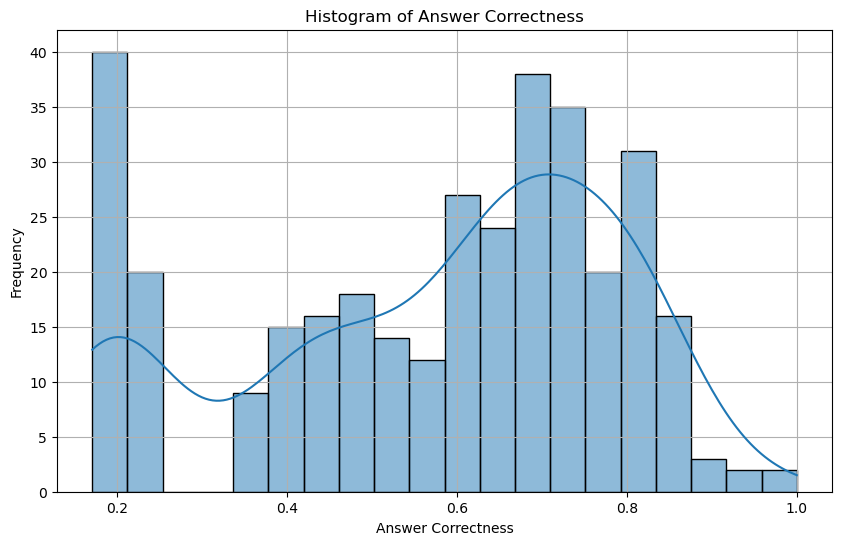

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of answer correctness
plt.figure(figsize=(10, 6))
sns.histplot(df['answer_correctness'], bins=20, kde=True)
plt.title('Histogram of Answer Correctness')
plt.xlabel('Answer Correctness')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


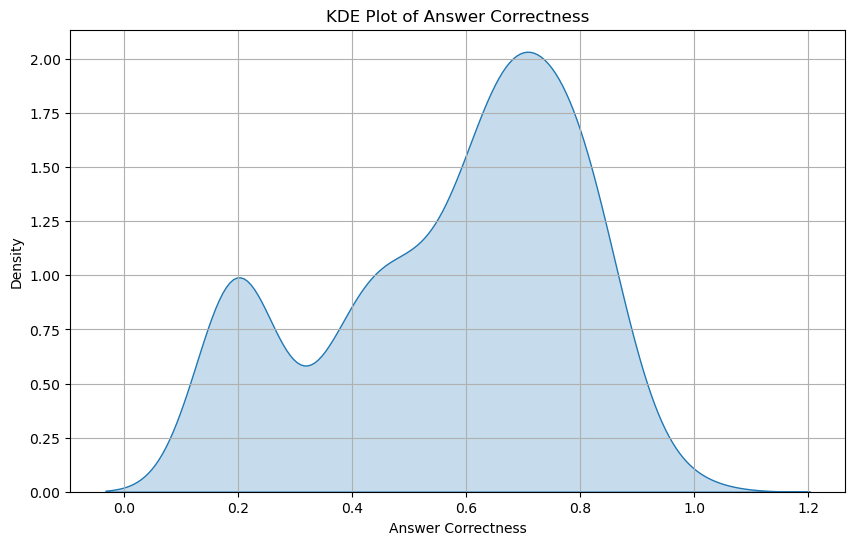

In [88]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['answer_correctness'], fill=True)
plt.title('KDE Plot of Answer Correctness')
plt.xlabel('Answer Correctness')
plt.ylabel('Density')
plt.grid(True)
plt.show()


/tmp/ipykernel_1299669/3051670883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BRAD', y='answer_correctness', palette='Set1')


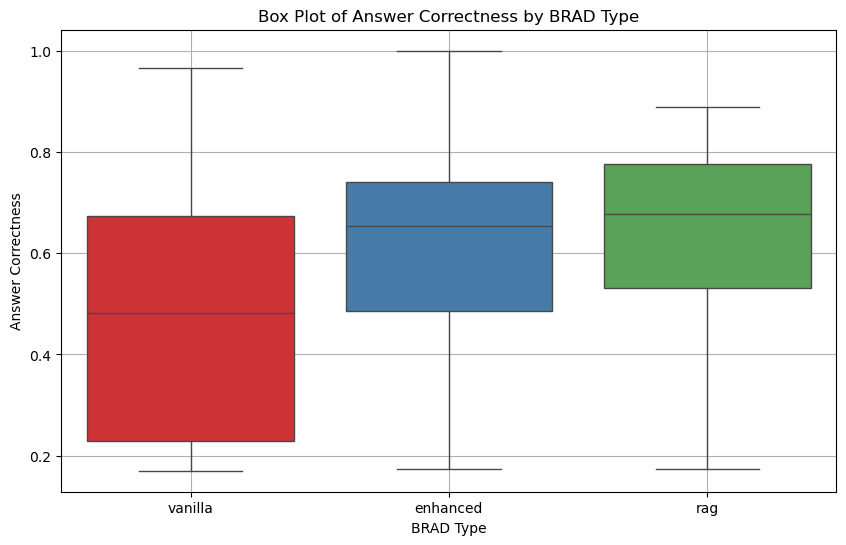

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BRAD', y='answer_correctness', palette='Set1')
plt.title('Box Plot of Answer Correctness by BRAD Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.show()


/tmp/ipykernel_1299669/1712325323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='BRAD', y='answer_correctness', palette='Set1')


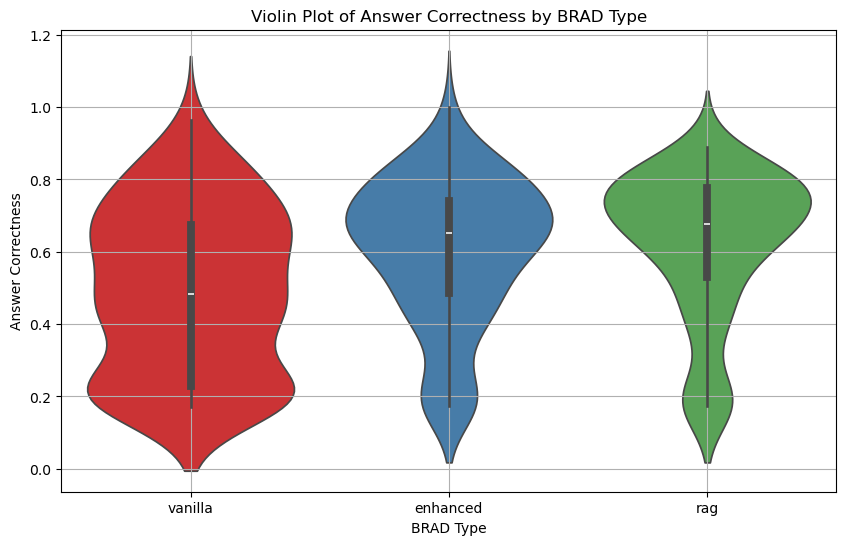

In [90]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='BRAD', y='answer_correctness', palette='Set1')
plt.title('Violin Plot of Answer Correctness by BRAD Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.show()


<Figure size 1000x1000 with 0 Axes>

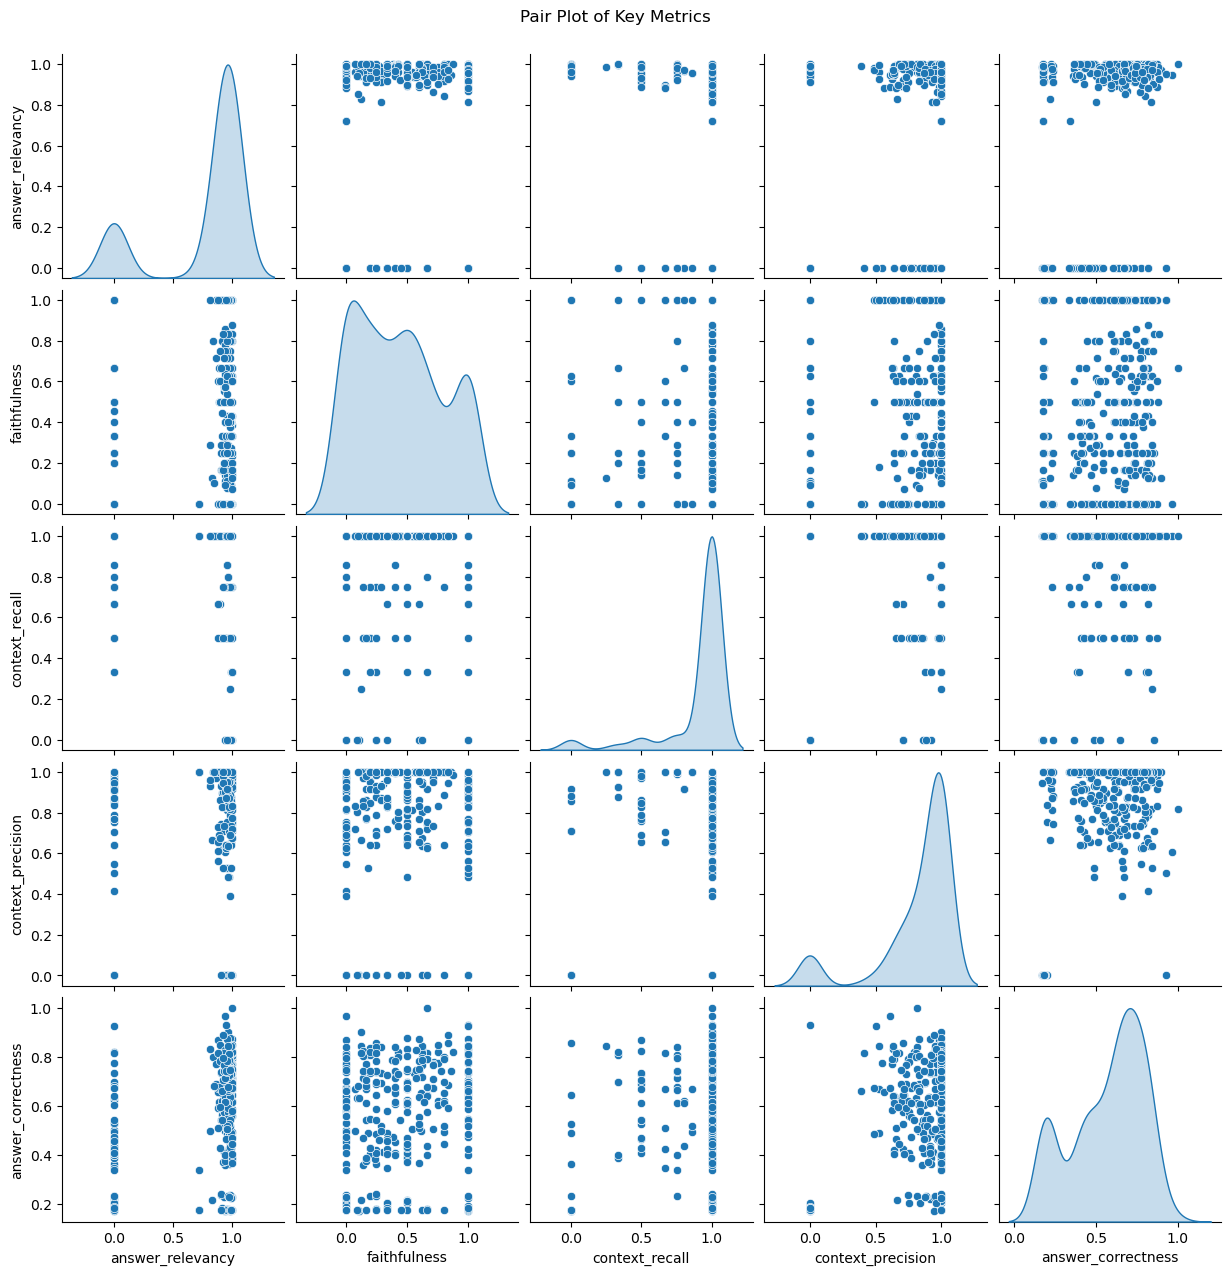

In [92]:
plt.figure(figsize=(10, 10))
sns.pairplot(df[['answer_relevancy', 'faithfulness', 'context_recall', 'context_precision', 'answer_correctness']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Metrics', y=1.02)
plt.show()


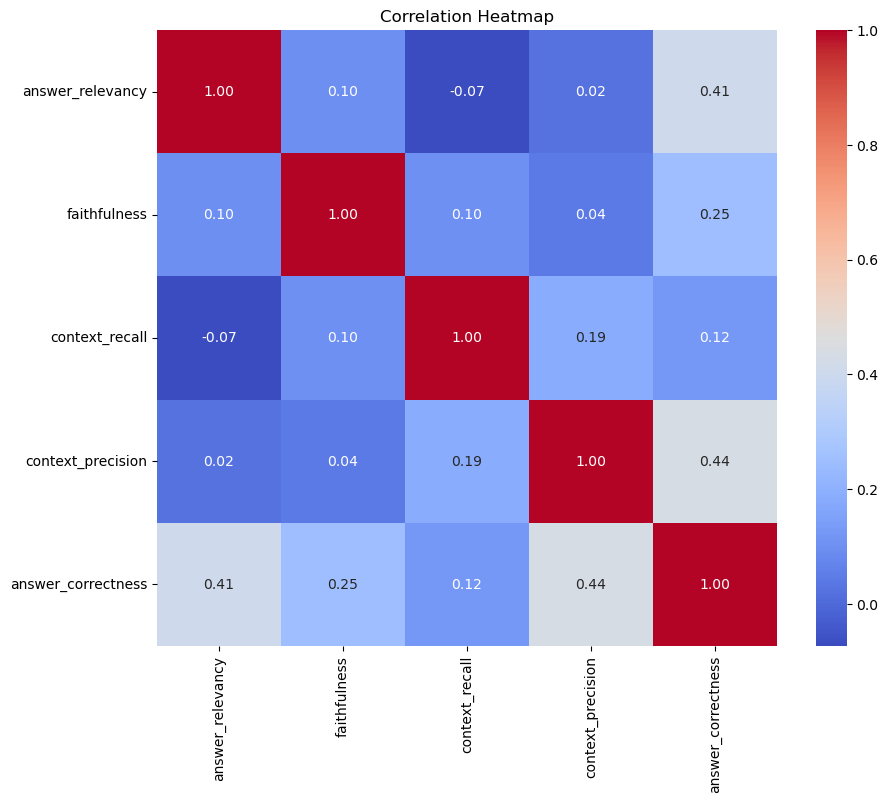

In [93]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['answer_relevancy', 'faithfulness', 'context_recall', 'context_precision', 'answer_correctness']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


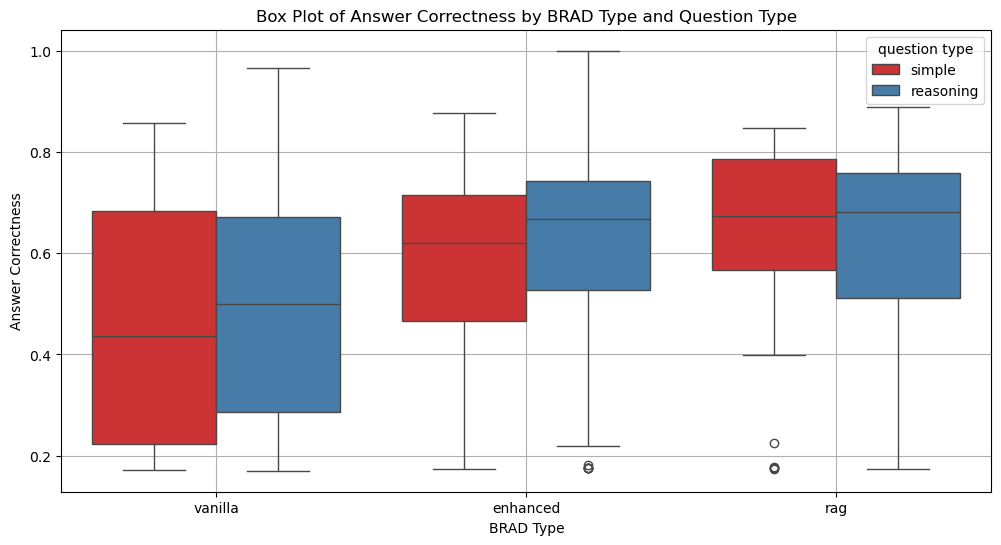

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='BRAD', y='answer_correctness', hue='question type', palette='Set1')
plt.title('Box Plot of Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.show()


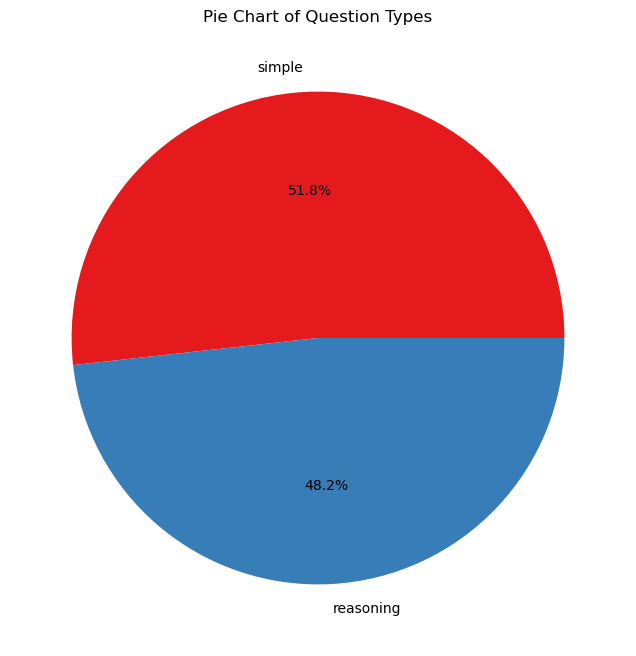

In [95]:
plt.figure(figsize=(8, 8))
counts = df['question type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Pie Chart of Question Types')
plt.show()


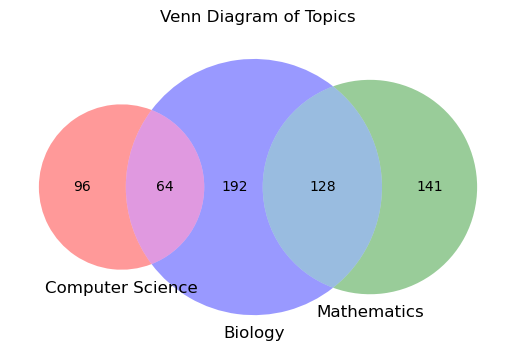

In [96]:
from matplotlib_venn import venn3

# Create a Venn diagram
venn3(
    subsets=(df['Computer Science'].sum(), df['Mathematics'].sum(), df['Computer Science'].sum() & df['Mathematics'].sum(),
             df['Biology'].sum(), df['Computer Science'].sum() & df['Biology'].sum(), df['Mathematics'].sum() & df['Biology'].sum(),
             df['Computer Science'].sum() & df['Mathematics'].sum() & df['Biology'].sum()),
    set_labels=('Computer Science', 'Mathematics', 'Biology')
)
plt.title('Venn Diagram of Topics')
plt.show()


In [97]:
# Example code assuming there's a 'timestamp' column in df
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='timestamp', y='answer_correctness', hue='question type', palette='Set1')
plt.title('Time Series of Answer Correctness')
plt.xlabel('Timestamp')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.show()


ValueError: Could not interpret value `timestamp` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

# Scratch

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

filepath = '/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2'
files = [
    'llm_sol.csv', # vanilla llm no rag for simple questions
    'llm_sol_reason.csv', # vanilla llm no rag for reasoning questions
    'rage_sol.csv', # enhanced rag for simple questions
    'rage_sol_reason.csv', # enhanced rag for reasoning questions
    'rag_sol.csv', # vanilla rag for simple questions
    'rag_sol_reason.csv', # vanilla rag for reasoning questions
    'test_data_1.csv', # Marc says I don't need this
    'test_data_1_reason.csv', # Marc says I don't need this
]

In [16]:
# question, context, ground true, question type, soruce, True, Answer, answer_relevancy, faithfulness, context_recall, context_precision, answer_correctness
for filei in range
df = pd.read_csv(os.path.join(filepath, files[0]), header=None)
df.columns = ['question',          # text
              'context',           # text
              'ground truth',      # text
              'question type',     # text
              'soruce',            # text
              'true',              # bool
              'answer',            # text
              'answer_relevancy',  # float
              'faithfulness',      # float
              'context_recall',    # float
              'context_precision', # float
              'answer_correctness' # float
             ]
df

,question,context,ground truth,question type,soruce,true,answer,answer_relevancy,faithfulness,context_recall,context_precision,answer_correctness
0,How do B cells undergo affinity maturation dur...,"[""'Affinity maturation\\nThe somatic mutation ...",B cells undergo affinity maturation during the...,simple,[{'source': 'dynamics of b cells in germinal c...,True,"During the germinal center reaction, B cells u...",1.000000,0.142857,1.000000,1.000000,0.715587
1,How is the timely clearance of neutrophils cri...,"[""'and forma phagocytic cup that engulfs antig...",Timely clearance of neutrophils is critical fo...,simple,[{'source': 'wound healing a cellular perspect...,True,BRAD: The timely clearance of neutrophils is c...,0.993118,0.500000,0.500000,0.653362,0.466499
2,How did Levinson and Smith use the method of p...,"[""'VI"" 'Th e metho d of Levinso n and Smith'\n...",Levinson and Smith used the method of proving ...,simple,[{'source': 'theory of limit cycles'}],True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.500000,1.000000,1.000000,0.215930
3,What steps were involved in the PacBio library...,"[""'of PacBio UMI sequencing of rRNA operons of...",PacBio library preparation for the American Gu...,simple,[{'source': 'high-accuracy long-read amplicon ...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.000000,1.000000,0.210913
4,How does Morse theory relate to the number of ...,"[""'270 An Overview of Floer Homology Theories ...",Morse theory relates to the number of critical...,simple,[{'source': 'banyaga-hurtubise2004_book_lectur...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.000000,0.968254,0.463782
5,How do ectopically expressed transcription fac...,"[""'their normal\\ncounterparts""\n 'This object...",Ectopically expressed transcription factors in...,simple,[{'source': 'forcing cells to change lineages'}],True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.000000,0.915079,0.222411
6,How are the kinetic parameters for each gene e...,"[""'ﬁrst step to achieve a more robust estimati...",The kinetic parameters for each gene in single...,simple,[{'source': 'mapping transcriptomic vector fie...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.500000,1.000000,1.000000,0.409393
7,How has in vivo reprogramming with viral vecto...,"[""'Int"" 'J' 'Mol' 'Sci'\n '2021 ,22, 3990 13 o...",In vivo reprogramming with viral vectors has b...,simple,[{'source': 'reprogramming- emerging strategie...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,1.000000,0.500000,0.849062,0.525345
8,How does Batch Normalization apply a linear tr...,"[""'0162-8828 (c) 2019 IEEE""\n 'Personal use is...",The answer to given question is not present in...,simple,[{'source': 'orthogonal deep neural networks'}],True,"I'm sorry, but I couldn't find specific inform...",0.000000,1.000000,1.000000,0.000000,0.193218
9,How is protein identification confirmed in the...,"[""'conclusion that the band(s) detected corres...",Protein identification in the antibody charact...,simple,[{'source': 'occupancy maps of 208 chromatin-a...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.500000,1.000000,1.000000,0.210671


/tmp/ipykernel_1634956/1370833052.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


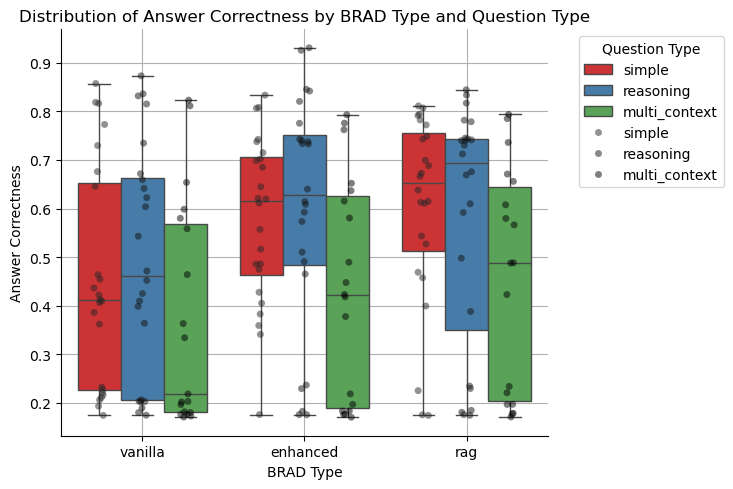

In [33]:
math_df = df[df['Mathematics']]
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=math_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=math_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300
# plt.savefig('answer_correctness_by_brad_type_and_question_type.png', dpi=300, figsize=(3, 5))
plt.show()



/tmp/ipykernel_1634956/1159122485.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


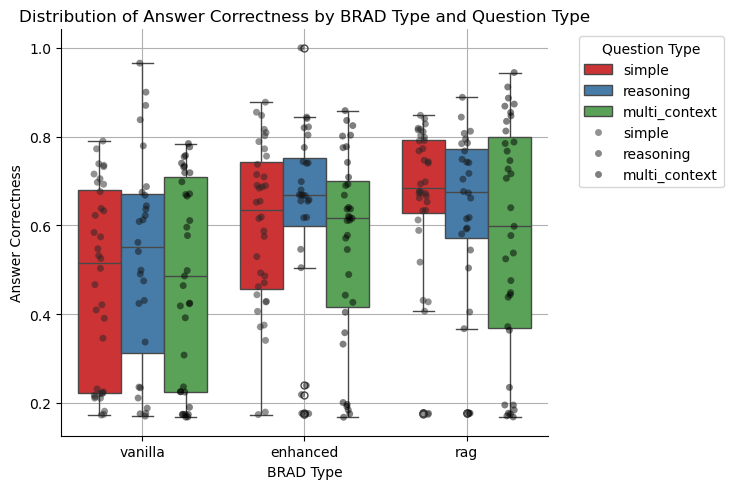

In [34]:
bio_df = df[df['Biology']]
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=bio_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=bio_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300
# plt.savefig('answer_correctness_by_brad_type_and_question_type.png', dpi=300, figsize=(3, 5))
plt.show()



/tmp/ipykernel_1634956/203150623.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


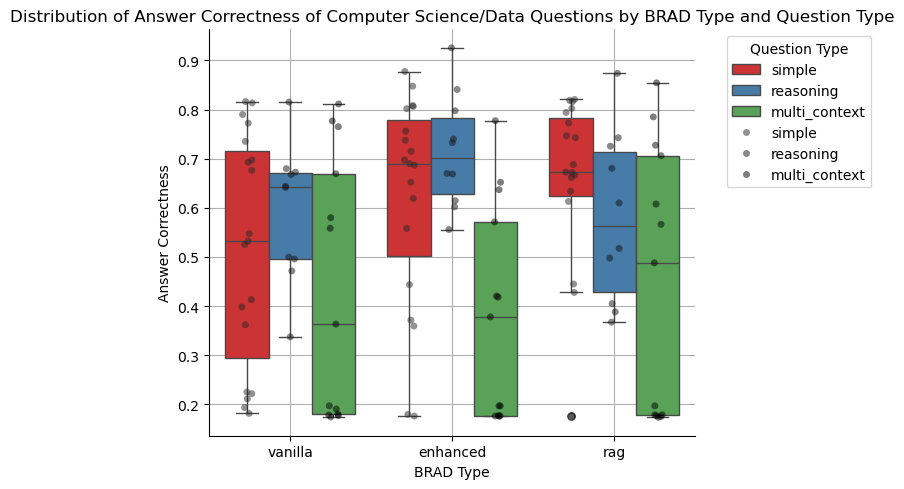

In [36]:
cs_df = df[df['Computer Science']]
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=cs_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=cs_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness of Computer Science/Data Questions by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300
# plt.savefig('answer_correctness_by_brad_type_and_question_type.png', dpi=300, figsize=(3, 5))
plt.show()

